In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
orig_file = '/Users/yufanwang/Desktop/Study/Project/Data/count_gram_mul_orig.txt'
noise_file = '/Users/yufanwang/Desktop/Study/Project/Data/v005/count_adv.txt'

In [6]:
weight = []
ntype = []
avg_count = []
avg_edit_rate = []

f = open(noise_file)               # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
for item in lines[2::3]:
    value = item.split('/')
    sub_value = value[10].split('_')
#     print(sub_value)
    ntype.append(sub_value[1])
    weight.append(float(sub_value[3]))
    sub_value = value[11].split(' ')
#     print(sub_value)
    avg_count.append(int(sub_value[1])/2755)
    avg_edit_rate.append(float(sub_value[2][:-2])/2755)
#     align.append(value[4])

In [7]:
data = {'ntype':ntype,
    'weight':weight,
       'avg edits':avg_count,
       'avg edit rate':avg_edit_rate}
df_noise = pd.DataFrame(data)
df_noise = df_noise.sort_values(by=['ntype','weight'])
df_noise

,ntype,weight,avg edits,avg edit rate
0,Gaussian-adversarial,0.1,0.001089,0.000017
1,Gaussian-adversarial,1.0,0.011252,0.000171
2,Gaussian-adversarial,10.0,0.025045,0.000325
3,Gaussian-adversarial,100.0,0.021779,0.000272
4,Gaussian-adversarial,1000.0,0.137205,0.001674


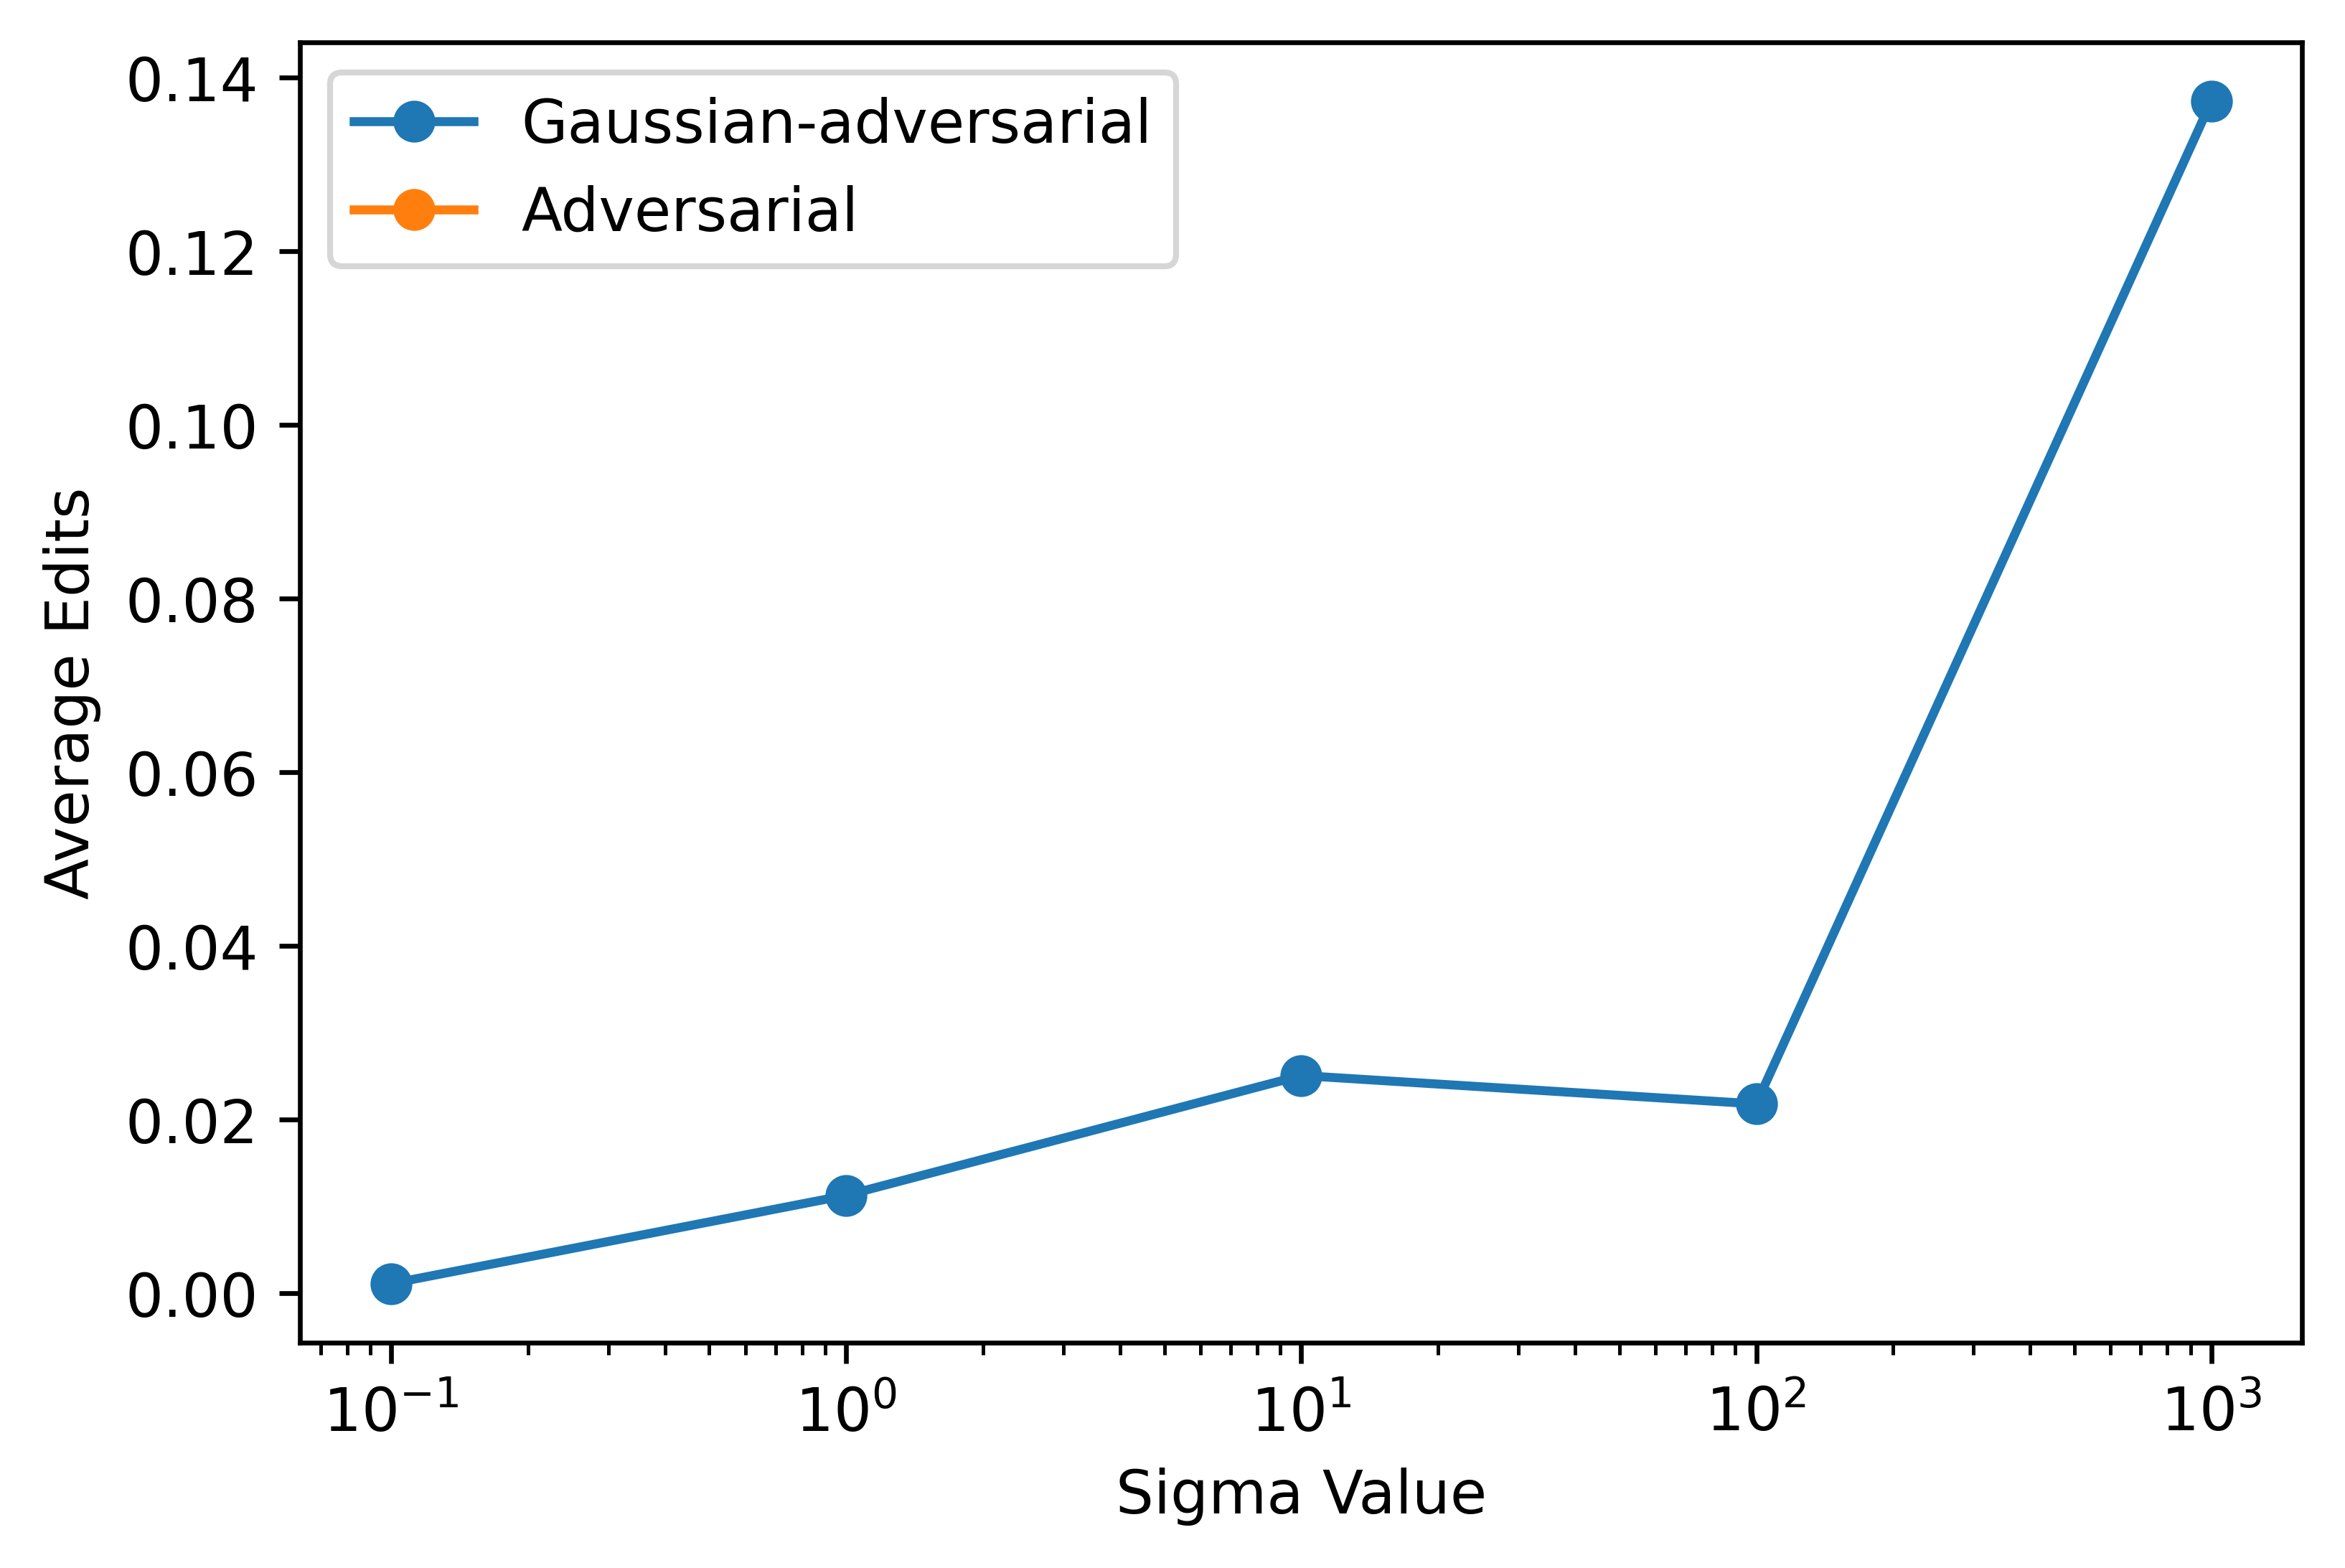

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

for name in ['Gaussian-adversarial','Adversarial']:
    df_selected = df_noise[df_noise['ntype'] == name]
    ax.plot(df_selected['weight'], df_selected['avg edits'], marker='o',label=name) # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_xscale('log')
ax.set_ylabel('Average Edits') #设置y轴名称 y label
# ax.set_title('Original Prediction -> Noisy Prediction') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


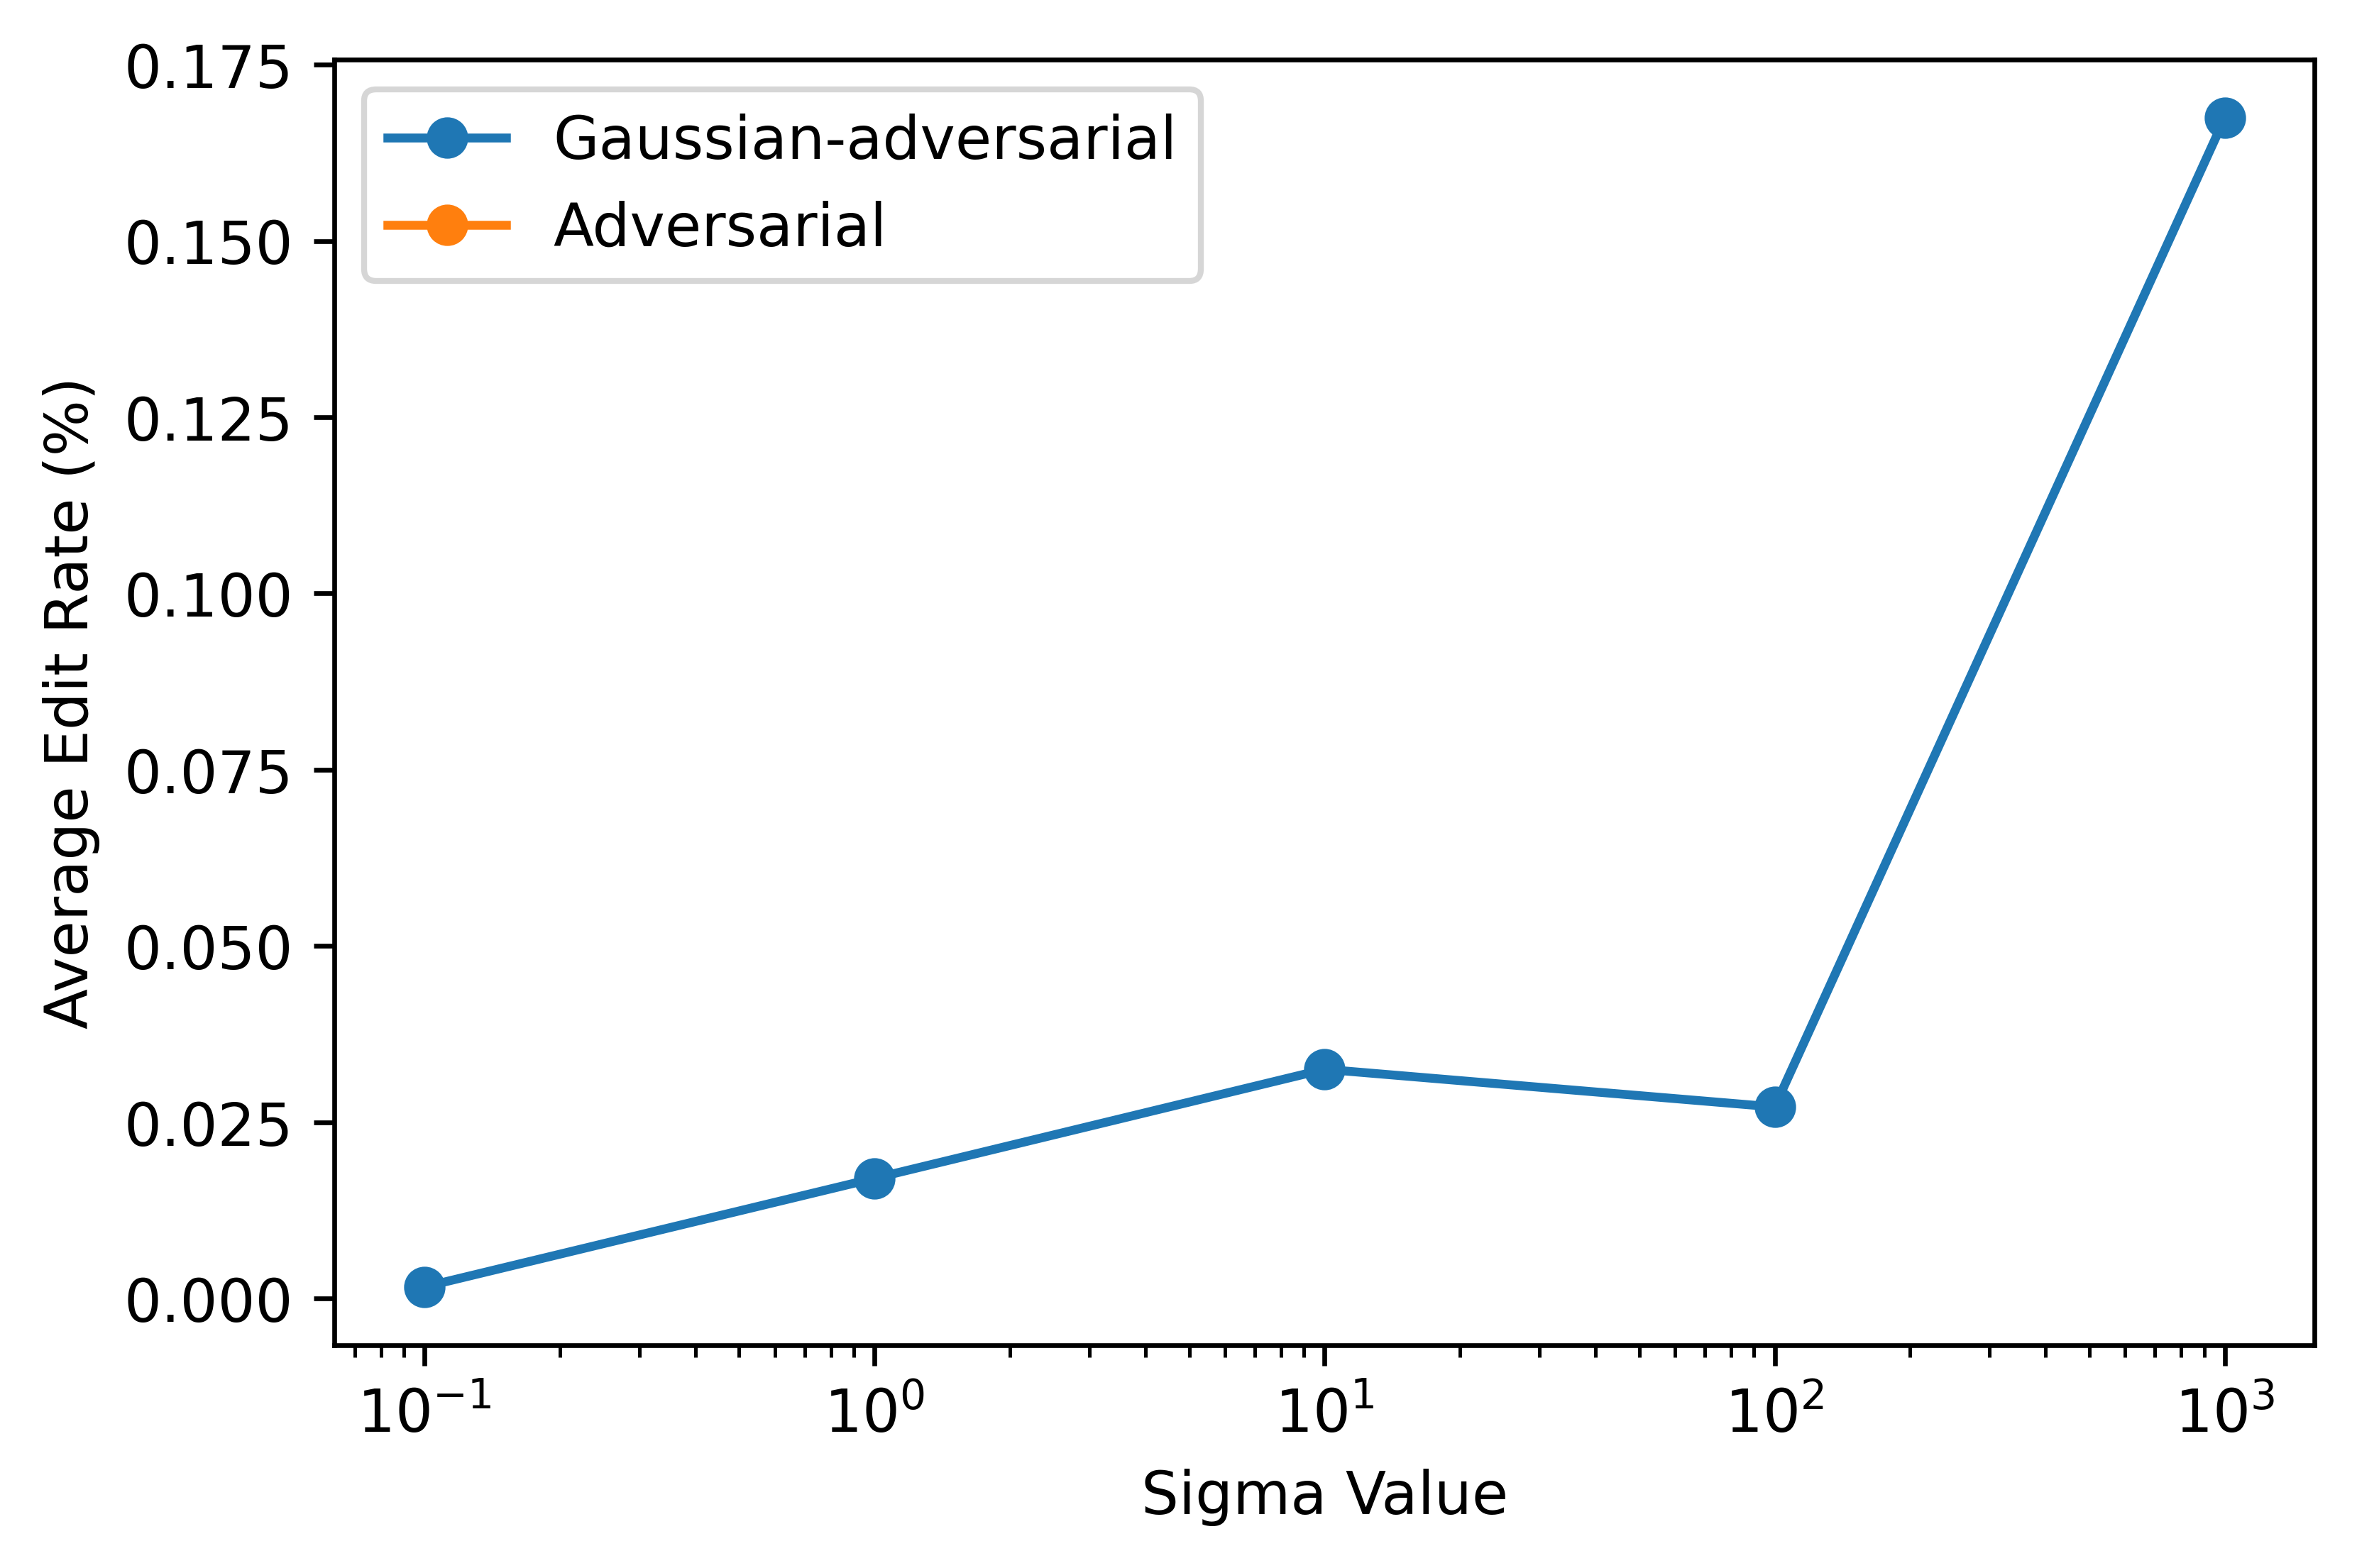

In [12]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

for name in ['Gaussian-adversarial','Adversarial']:
    df_selected = df_noise[df_noise['ntype'] == name]
    ax.plot(df_selected['weight'], df_selected['avg edit rate'] * 100, marker='o',label=name) # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edit Rate (%)') #设置y轴名称 y label
ax.set_xscale('log')
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


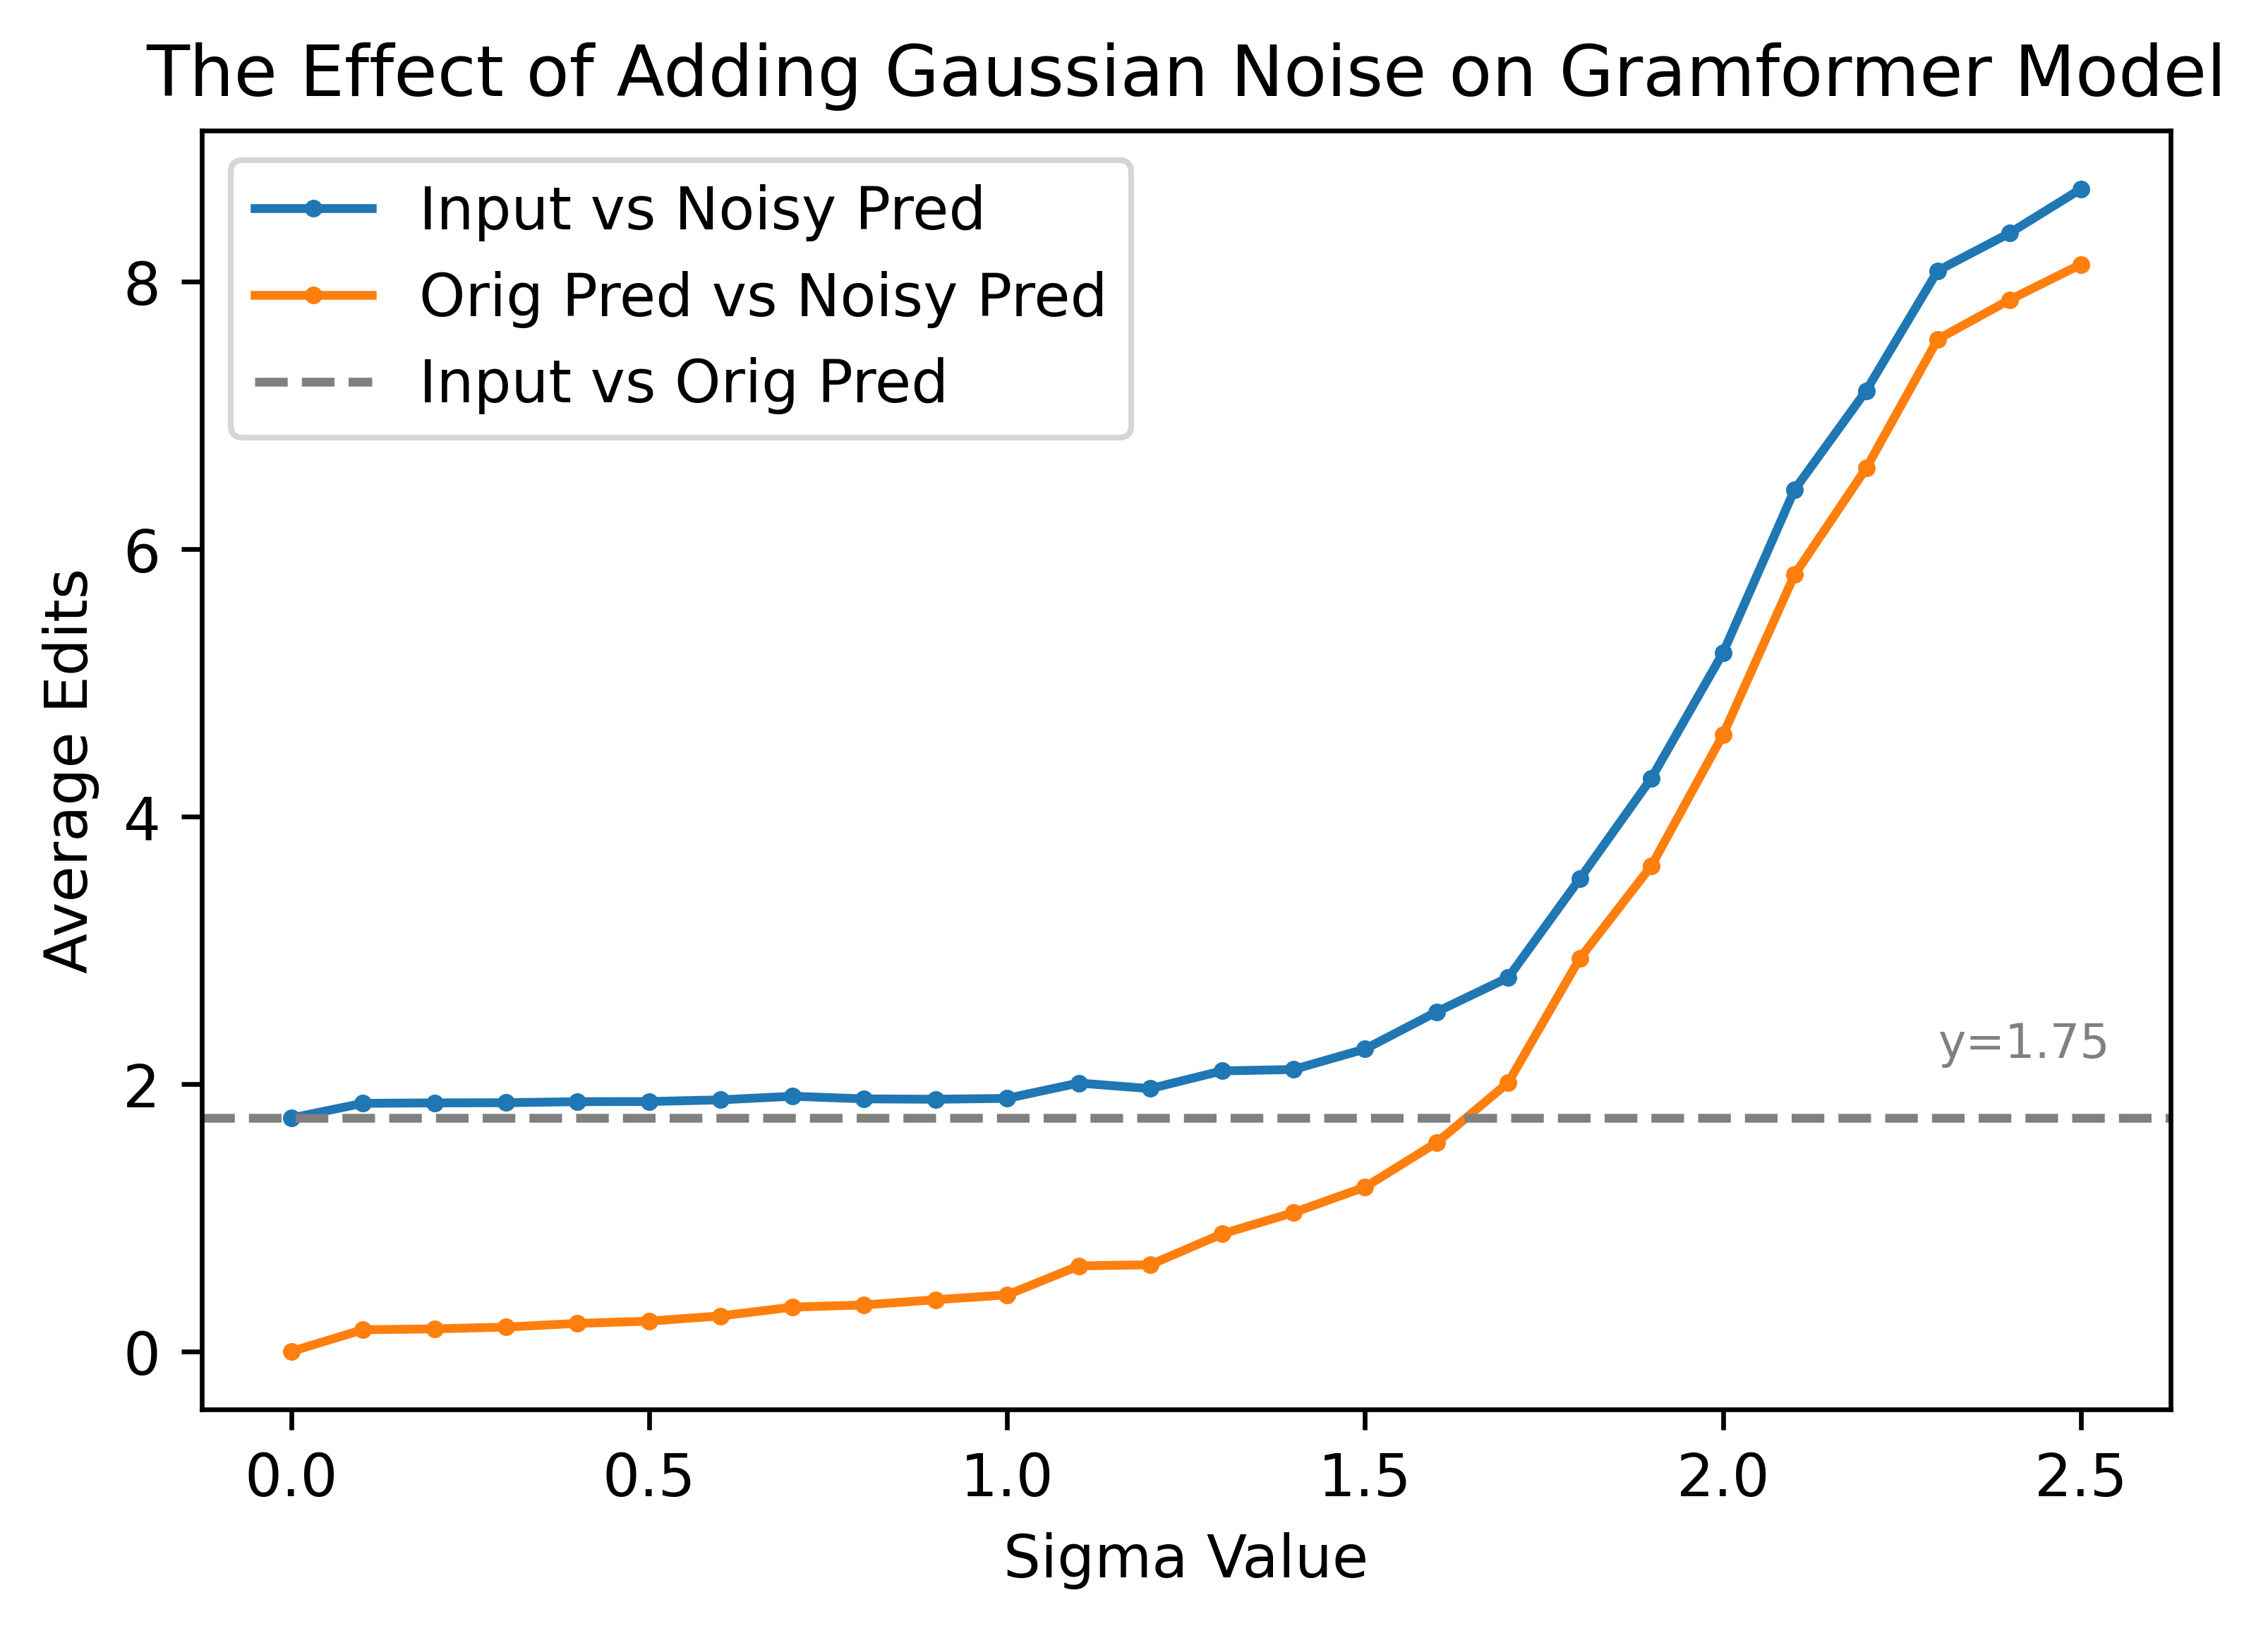

In [24]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

ax.plot(df_trans['weight'], df_trans['avg edits'], marker='o',markersize=2,label='Input vs Noisy Pred') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_noise['weight'], df_noise['avg edits'], marker='o',markersize=2,label='Orig Pred vs Noisy Pred') # 作y1 = x 图，并标记此线名为linear
ax.axhline(y=1.745554, linestyle='--',color='grey',label='Input vs Orig Pred')
plt.text(2.3,2.2,'y=1.75',fontdict={'size':'8','color':'grey'})
ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edits') #设置y轴名称 y label
ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


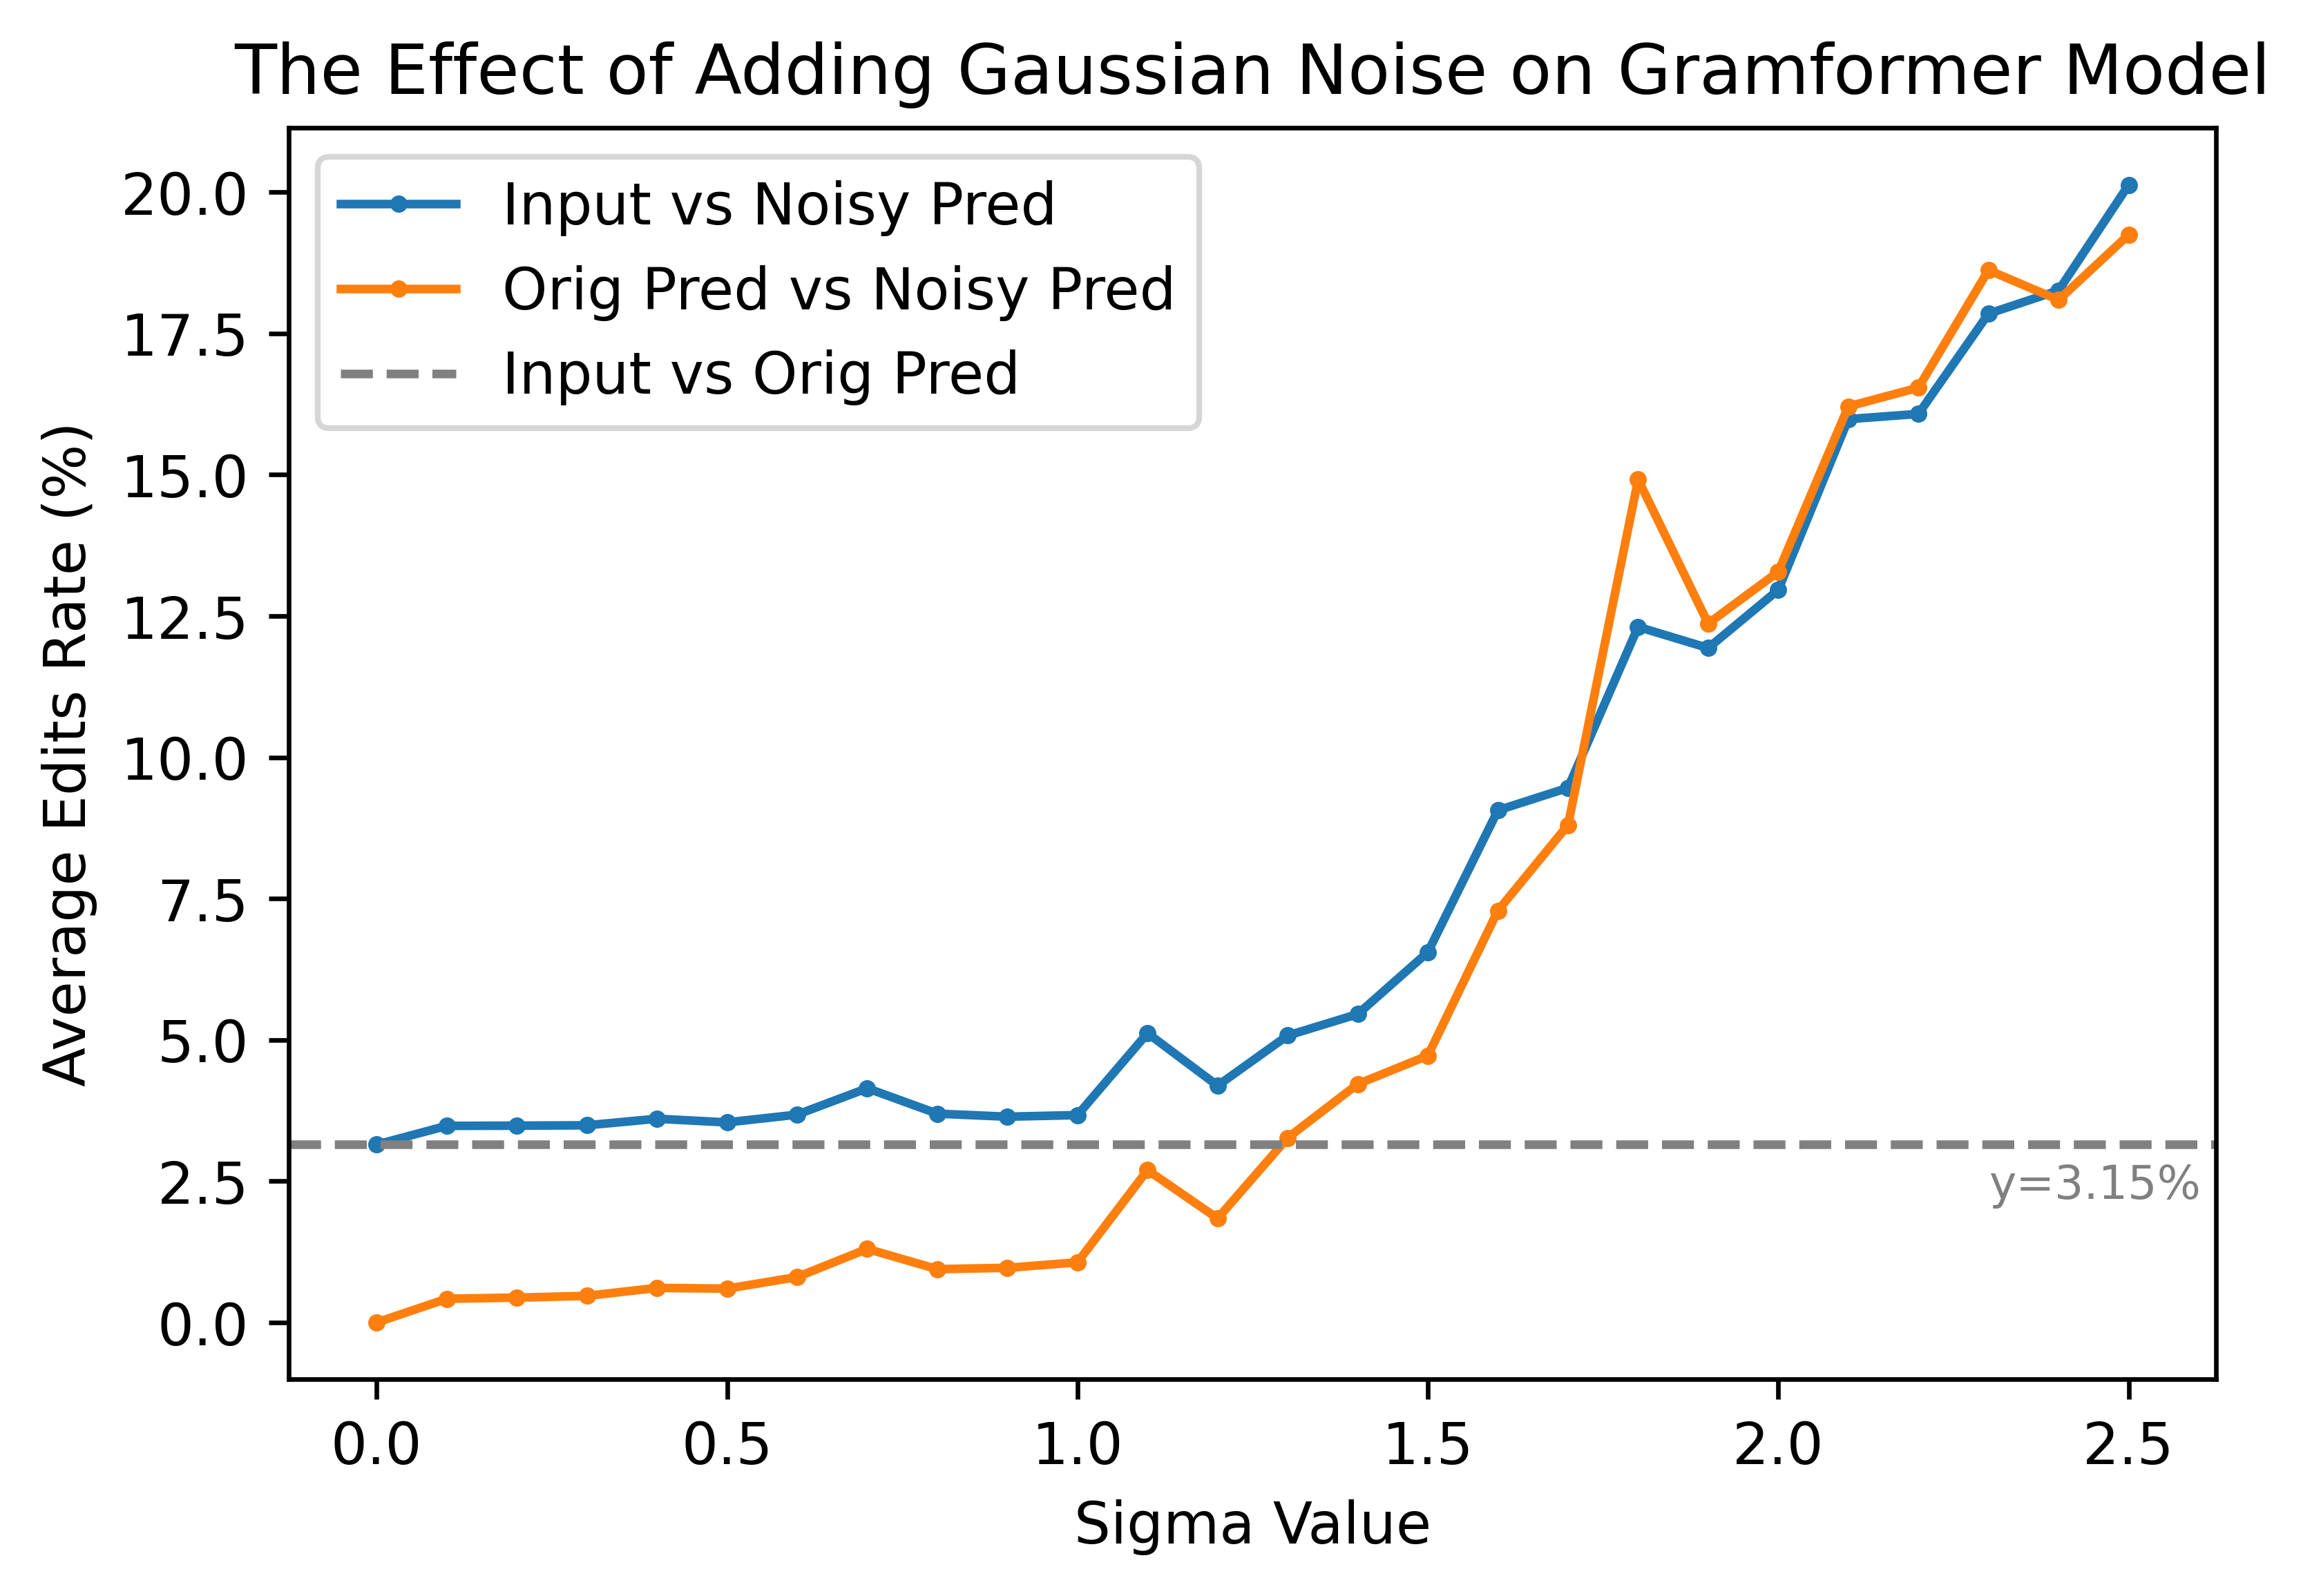

In [25]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

ax.plot(df_trans['weight'],df_trans['avg edit rate']*100, marker='o',markersize=2,label='Input vs Noisy Pred') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_noise['weight'], df_noise['avg edit rate']*100, marker='o',markersize=2,label='Orig Pred vs Noisy Pred') # 作y1 = x 图，并标记此线名为linear
ax.axhline(y=3.1477999999999997, linestyle='--',color='grey',label='Input vs Orig Pred')
plt.text(2.3,2.2,'y=3.15%',fontdict={'size':'8','color':'grey'})
ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edits Rate (%)') #设置y轴名称 y label
ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


In [8]:
txt_file = '/Users/yufanwang/Desktop/Study/Project/Data/count_ber.txt'

word_keep = []
avg_count = []
avg_edit_rate = []

f = open(txt_file)               # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
for item in lines[2::3]:
    value = item.split('/')
#     print(value)
    if len(value) > 11:
        print(value[11][16:])
# #         mean.append(float(value[11][15:18]))
        word_keep.append(float(value[11][16:]))
        sub_value = value[12].split(' ')
#         print(sub_value)
        avg_count.append(int(sub_value[1])/2755)
        avg_edit_rate.append(float(sub_value[2][:-2])/2755)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [12]:
data = {'word keep':word_keep,
       'avg edits':avg_count,
       'avg edit rate':avg_edit_rate}
df_ber = pd.DataFrame(data)
df_ber

,word keep,avg edits,avg edit rate
0,0.1,7.142650,0.141148
1,0.2,4.532486,0.085682
2,0.3,1.137568,0.027008
3,0.4,0.567695,0.009215
4,0.5,0.397822,0.005723
5,0.6,0.305989,0.004365
6,0.7,0.219238,0.003063
7,0.8,0.155717,0.002009
8,0.9,0.088929,0.001228
9,1.0,0.000000,0.000000


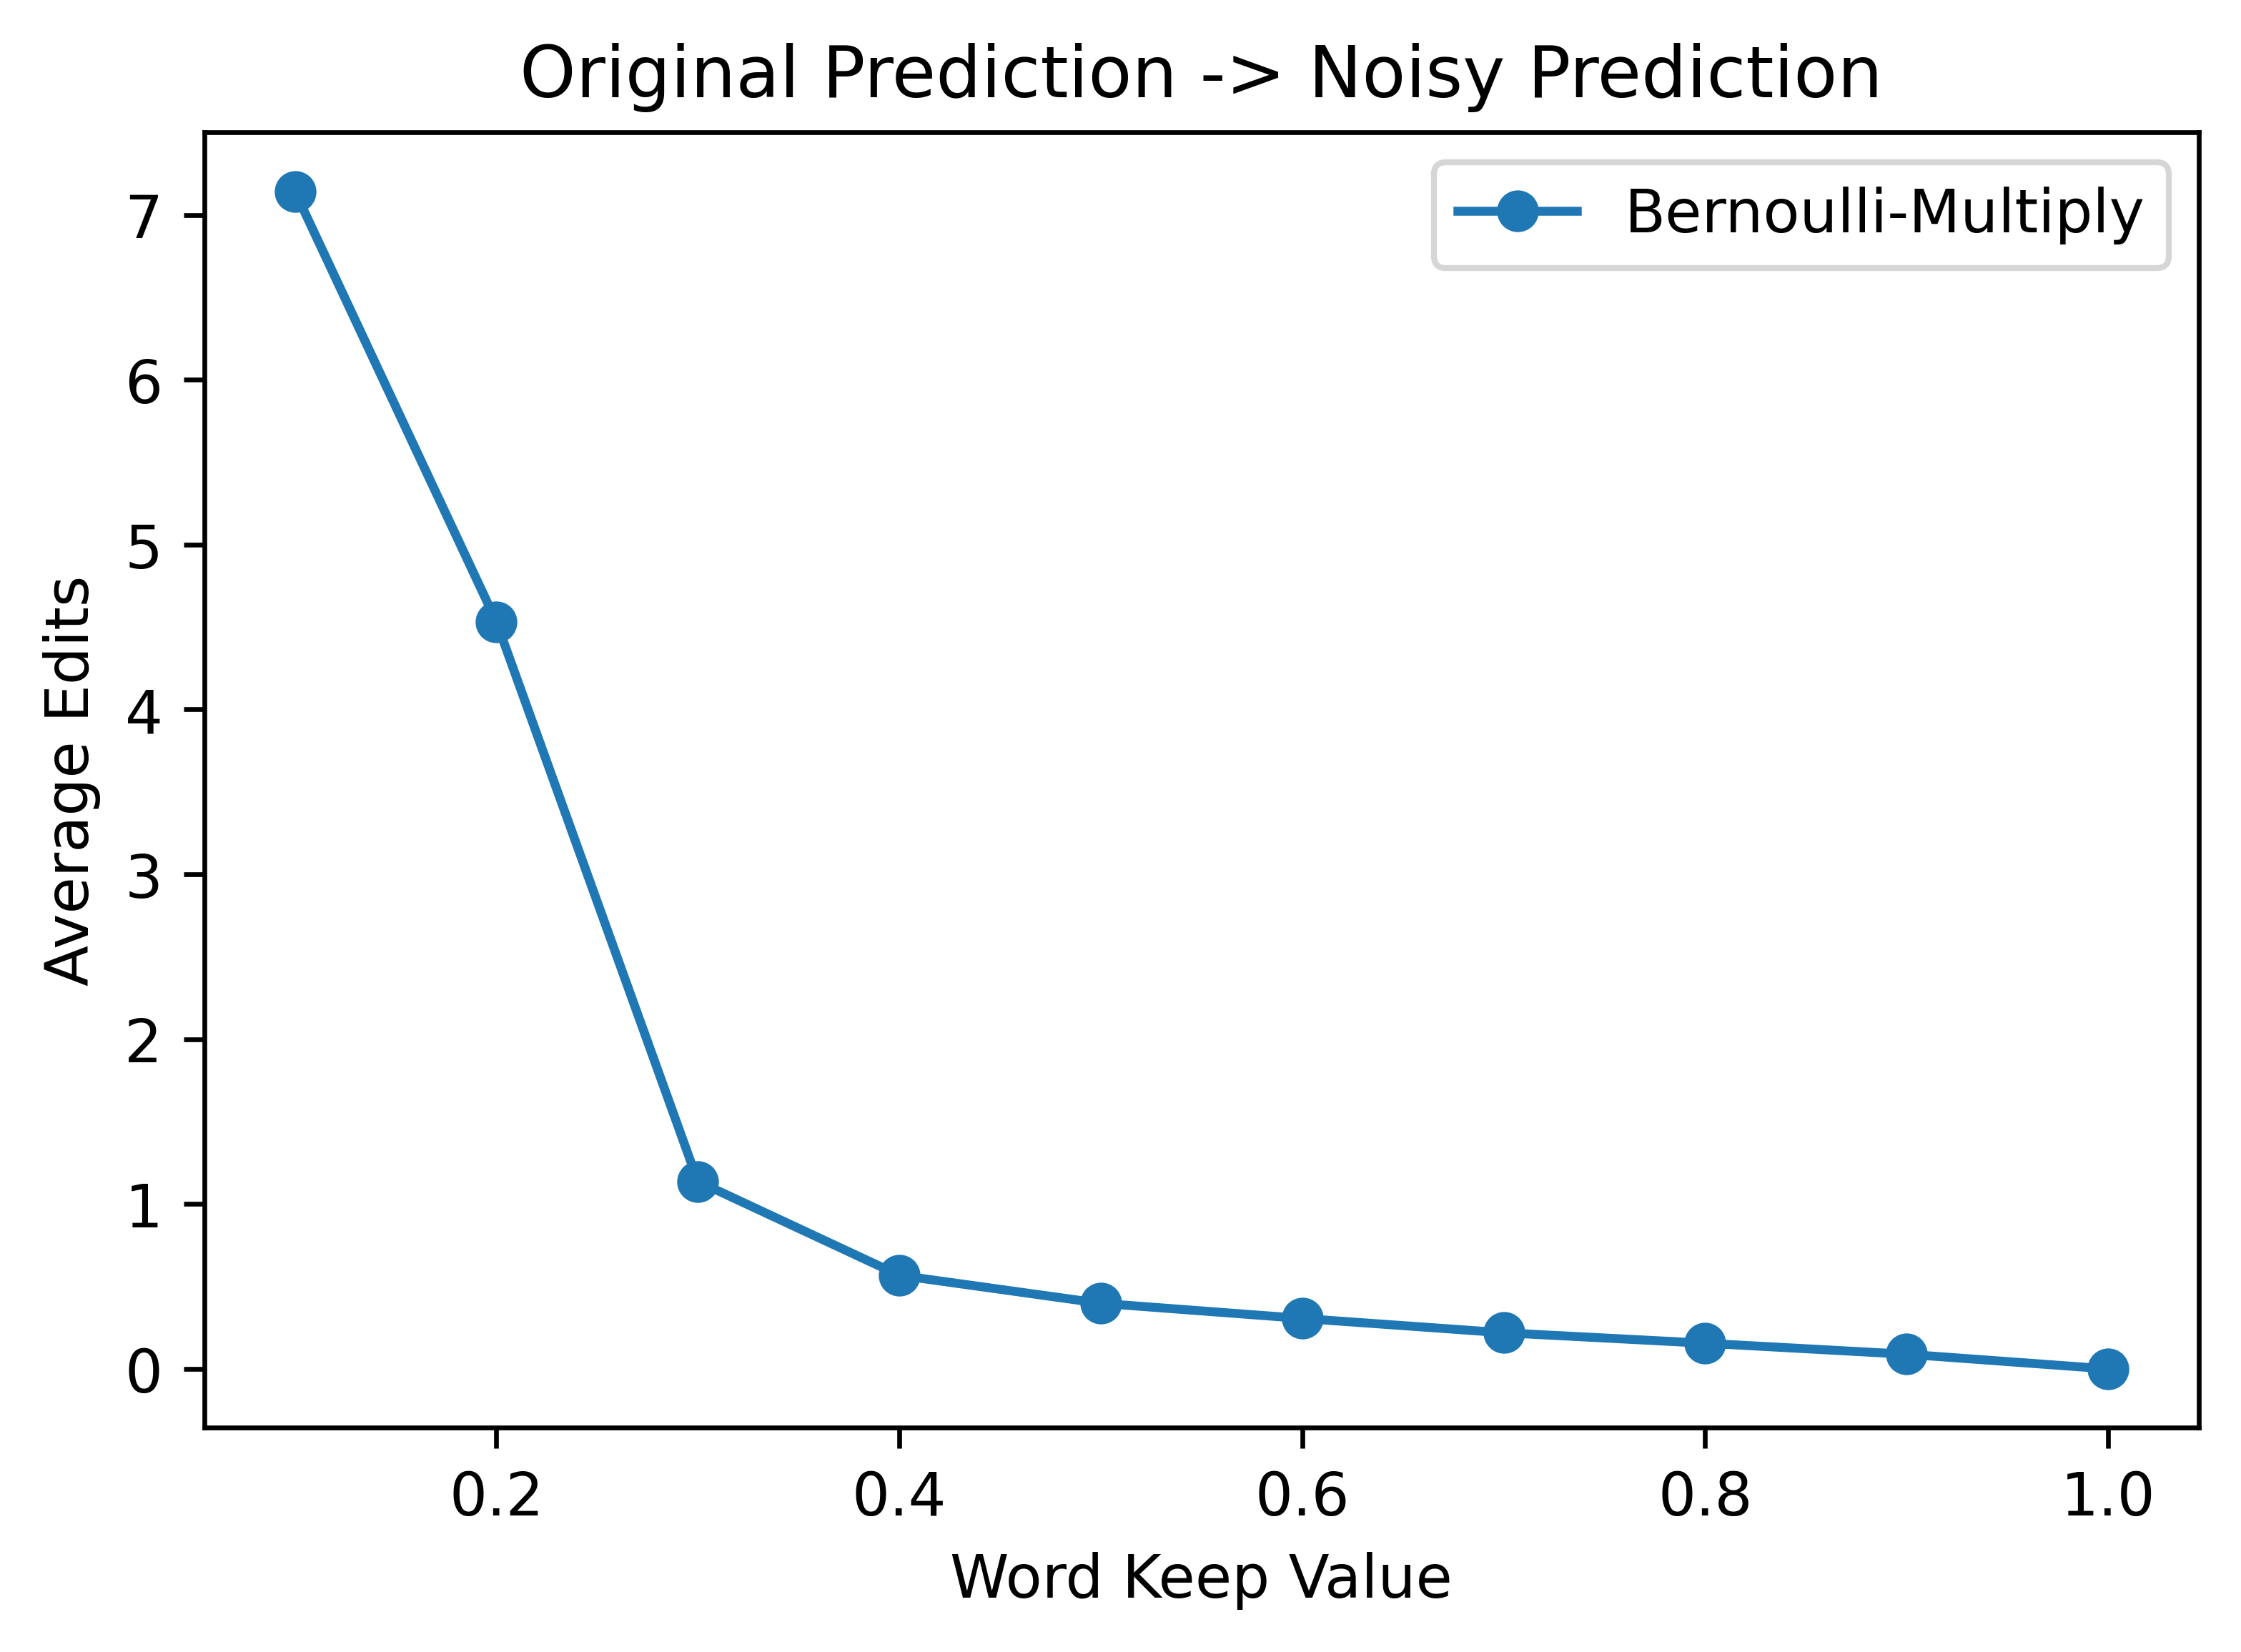

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df_ber['word keep'], df_ber['avg edits'], marker='o',label='Bernoulli-Multiply') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Word Keep Value') #设置x轴名称 x label
ax.set_ylabel('Average Edits') #设置y轴名称 y label
ax.set_title('Original Prediction -> Noisy Prediction') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


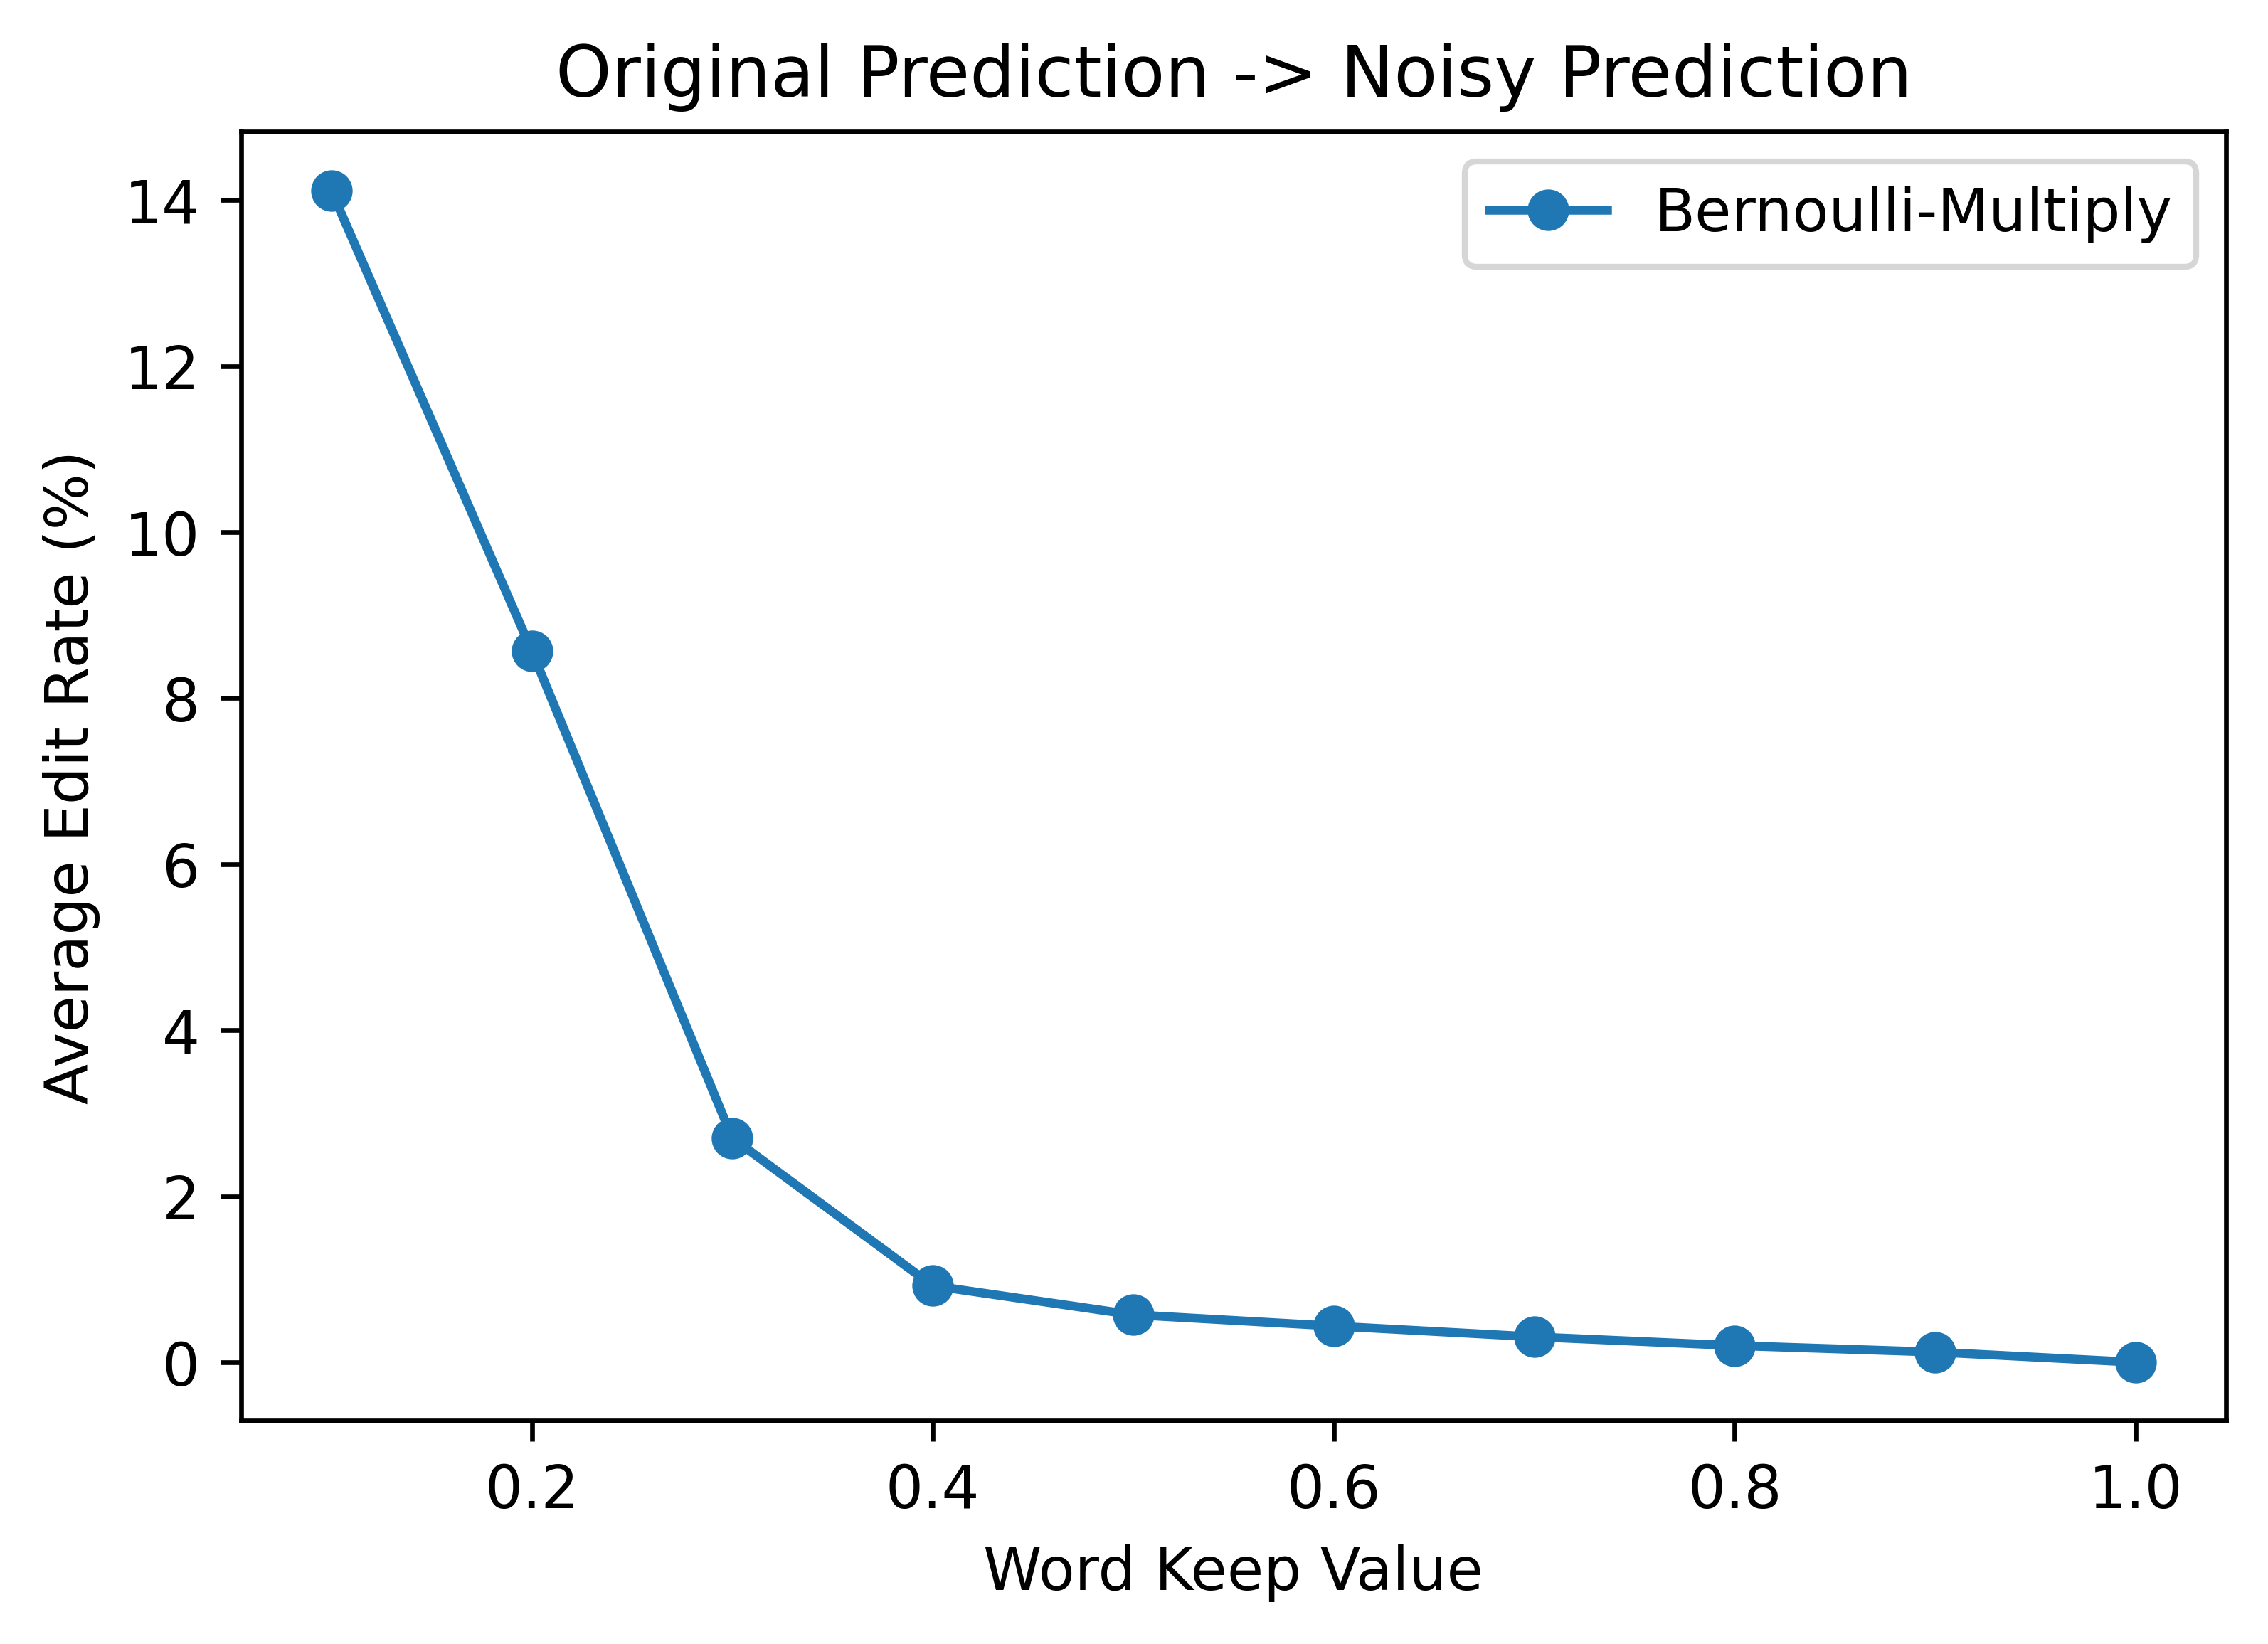

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df_ber['word keep'], df_ber['avg edit rate']*100, marker='o',label='Bernoulli-Multiply') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Word Keep Value') #设置x轴名称 x label
ax.set_ylabel('Average Edit Rate (%)') #设置y轴名称 y label
ax.set_title('Original Prediction -> Noisy Prediction') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


# Old

In [60]:
txt_file = '/Users/yufanwang/Desktop/Study/Project/NoiseGram/results/count_v2.txt'
weight = []
avg_count = []
avg_edit_rate = []

f = open(txt_file)               # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
for item in lines:
    value = item.split('/')
#     print(value[11][19:])
    weight.append(float(value[11][19:]))
    sub_value = value[12].split(' ')
#     print(sub_value)
    avg_count.append(int(sub_value[1])/1000)
    avg_edit_rate.append(float(sub_value[2][:-2])/1000)
#     align.append(value[4])

In [61]:
data = {'weight':weight,
       'avg edits':avg_count,
       'avg edit rate':avg_edit_rate}
df = pd.DataFrame(data)
df


,weight,avg edits,avg edit rate
0,0.0,0.000,0.000000
1,0.2,0.033,0.000415
2,0.4,0.103,0.001406
3,0.6,0.164,0.004932
4,0.8,0.228,0.007916
5,1.0,0.382,0.010425
6,1.2,0.509,0.013770
7,1.4,0.763,0.019369
8,1.6,1.246,0.035085
9,1.8,1.698,0.049310


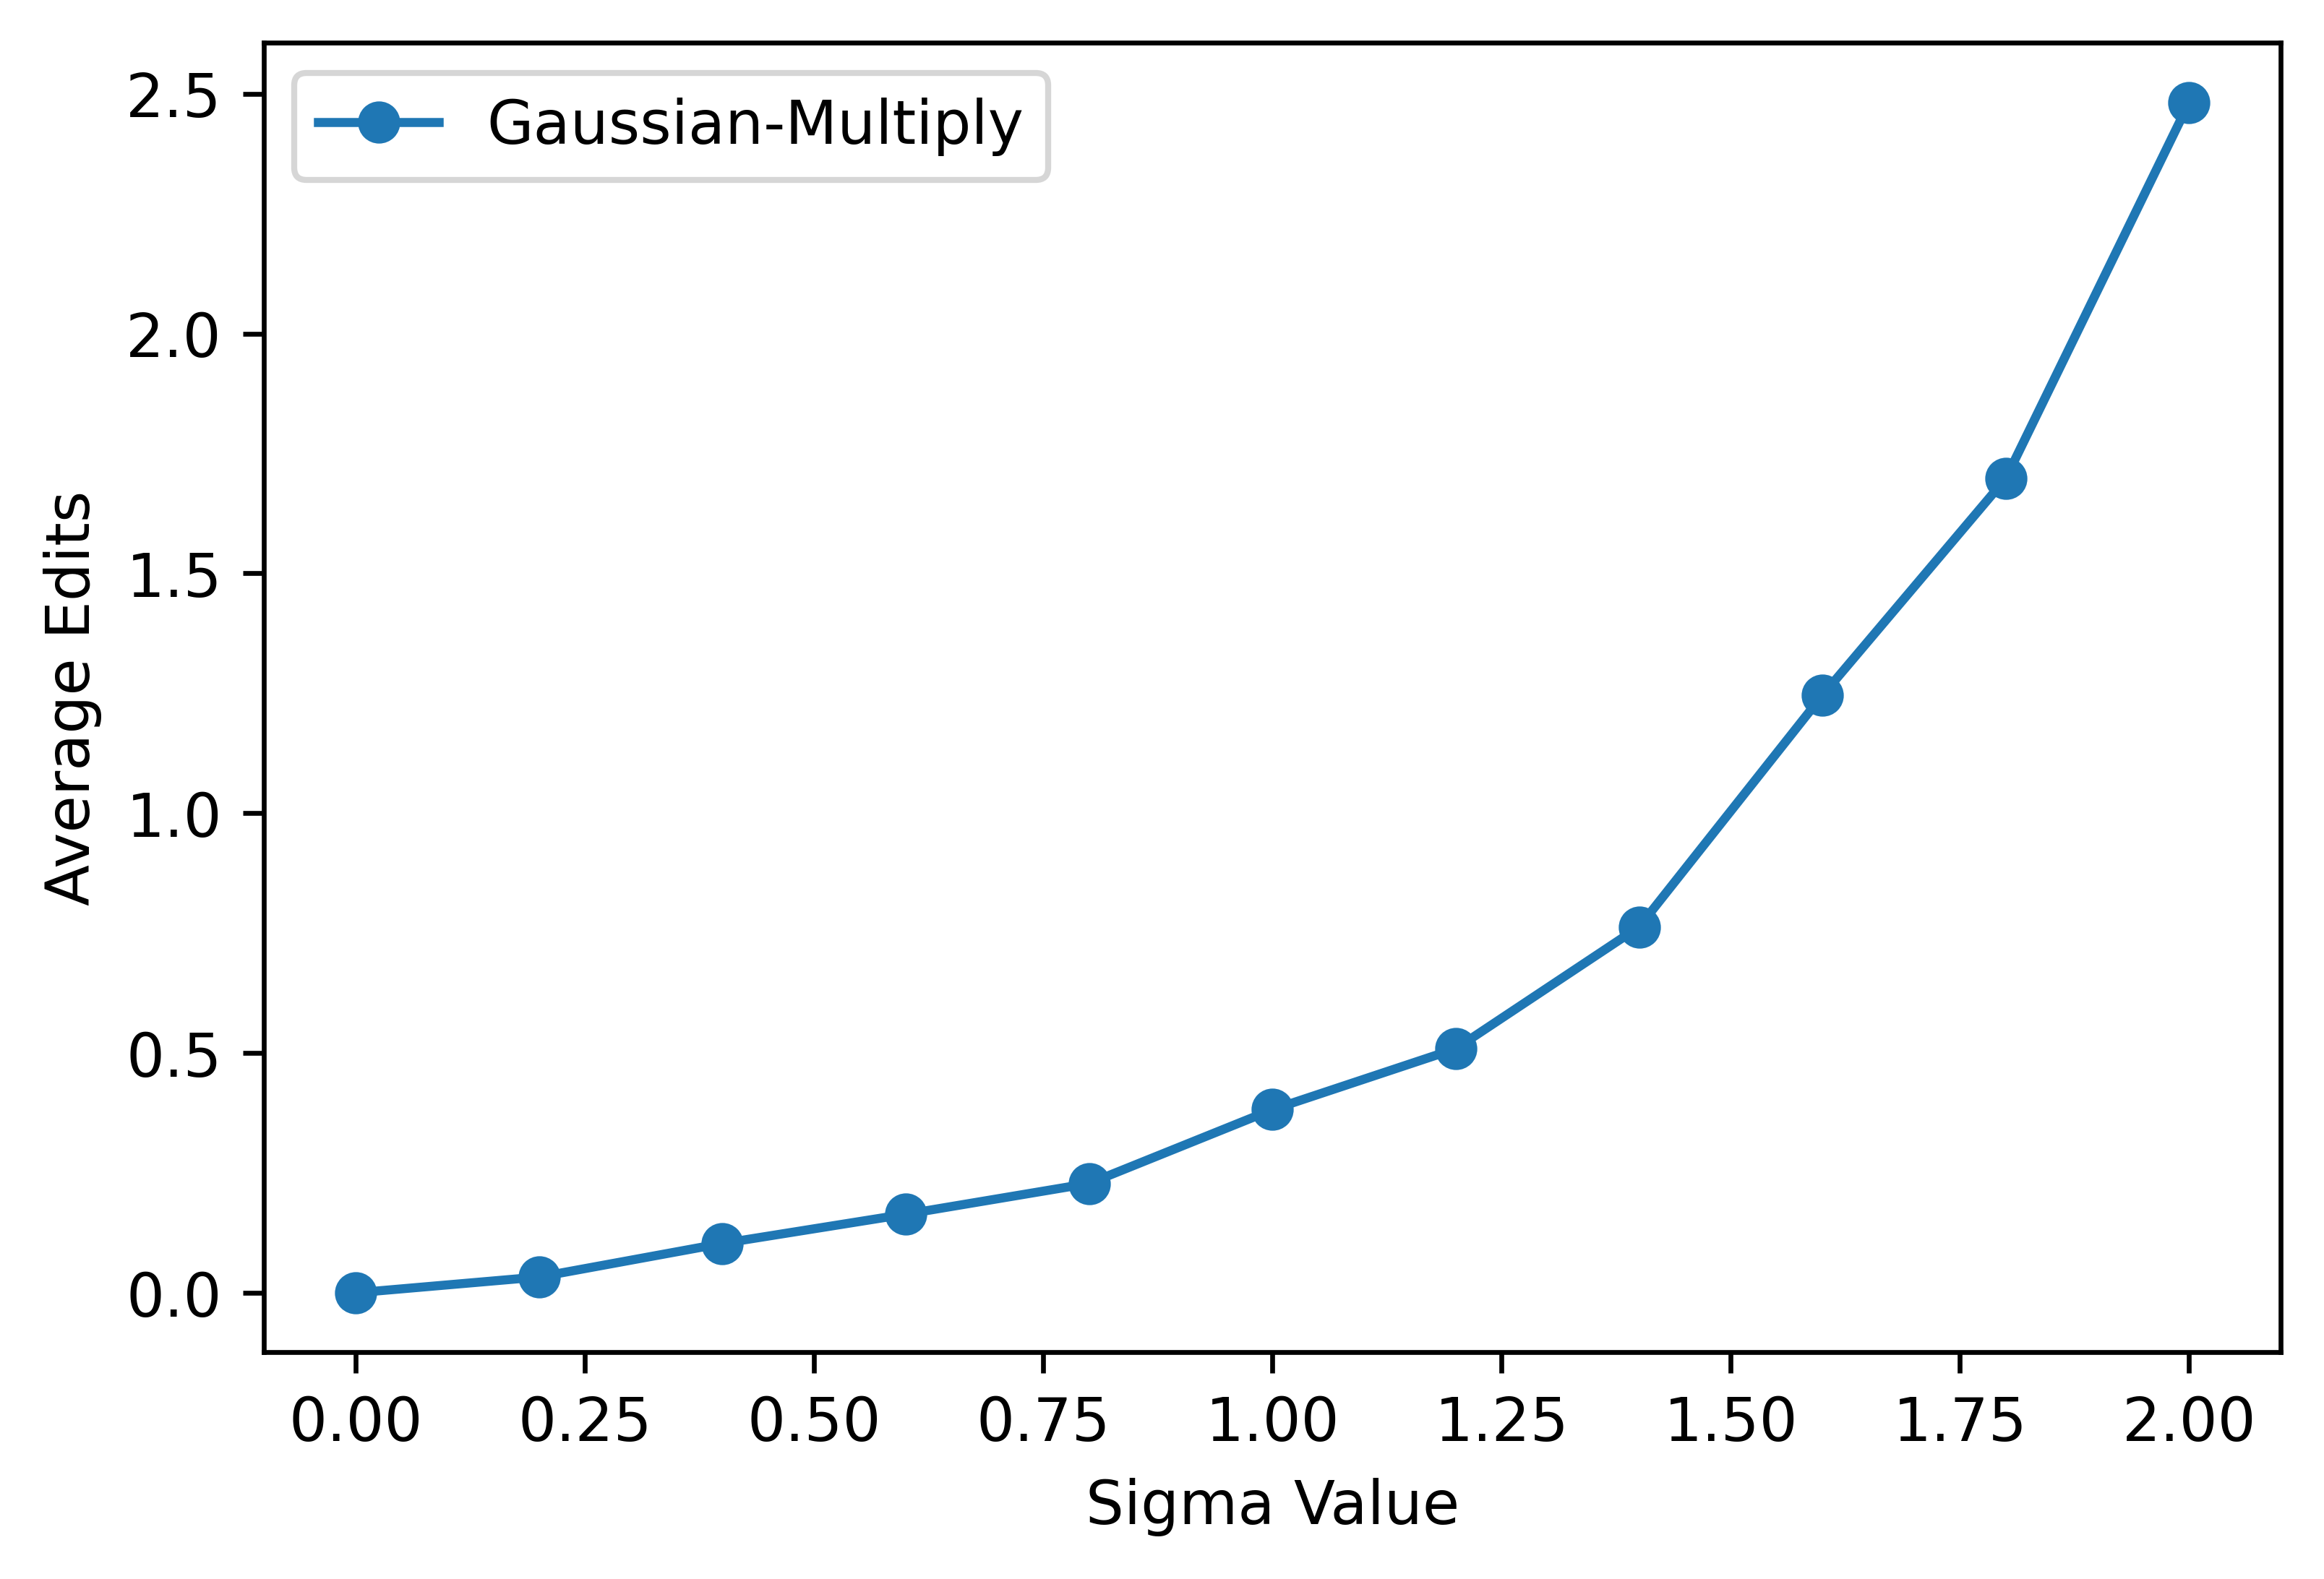

In [62]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edits'], marker='o',label='Gaussian-Multiply') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edits') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


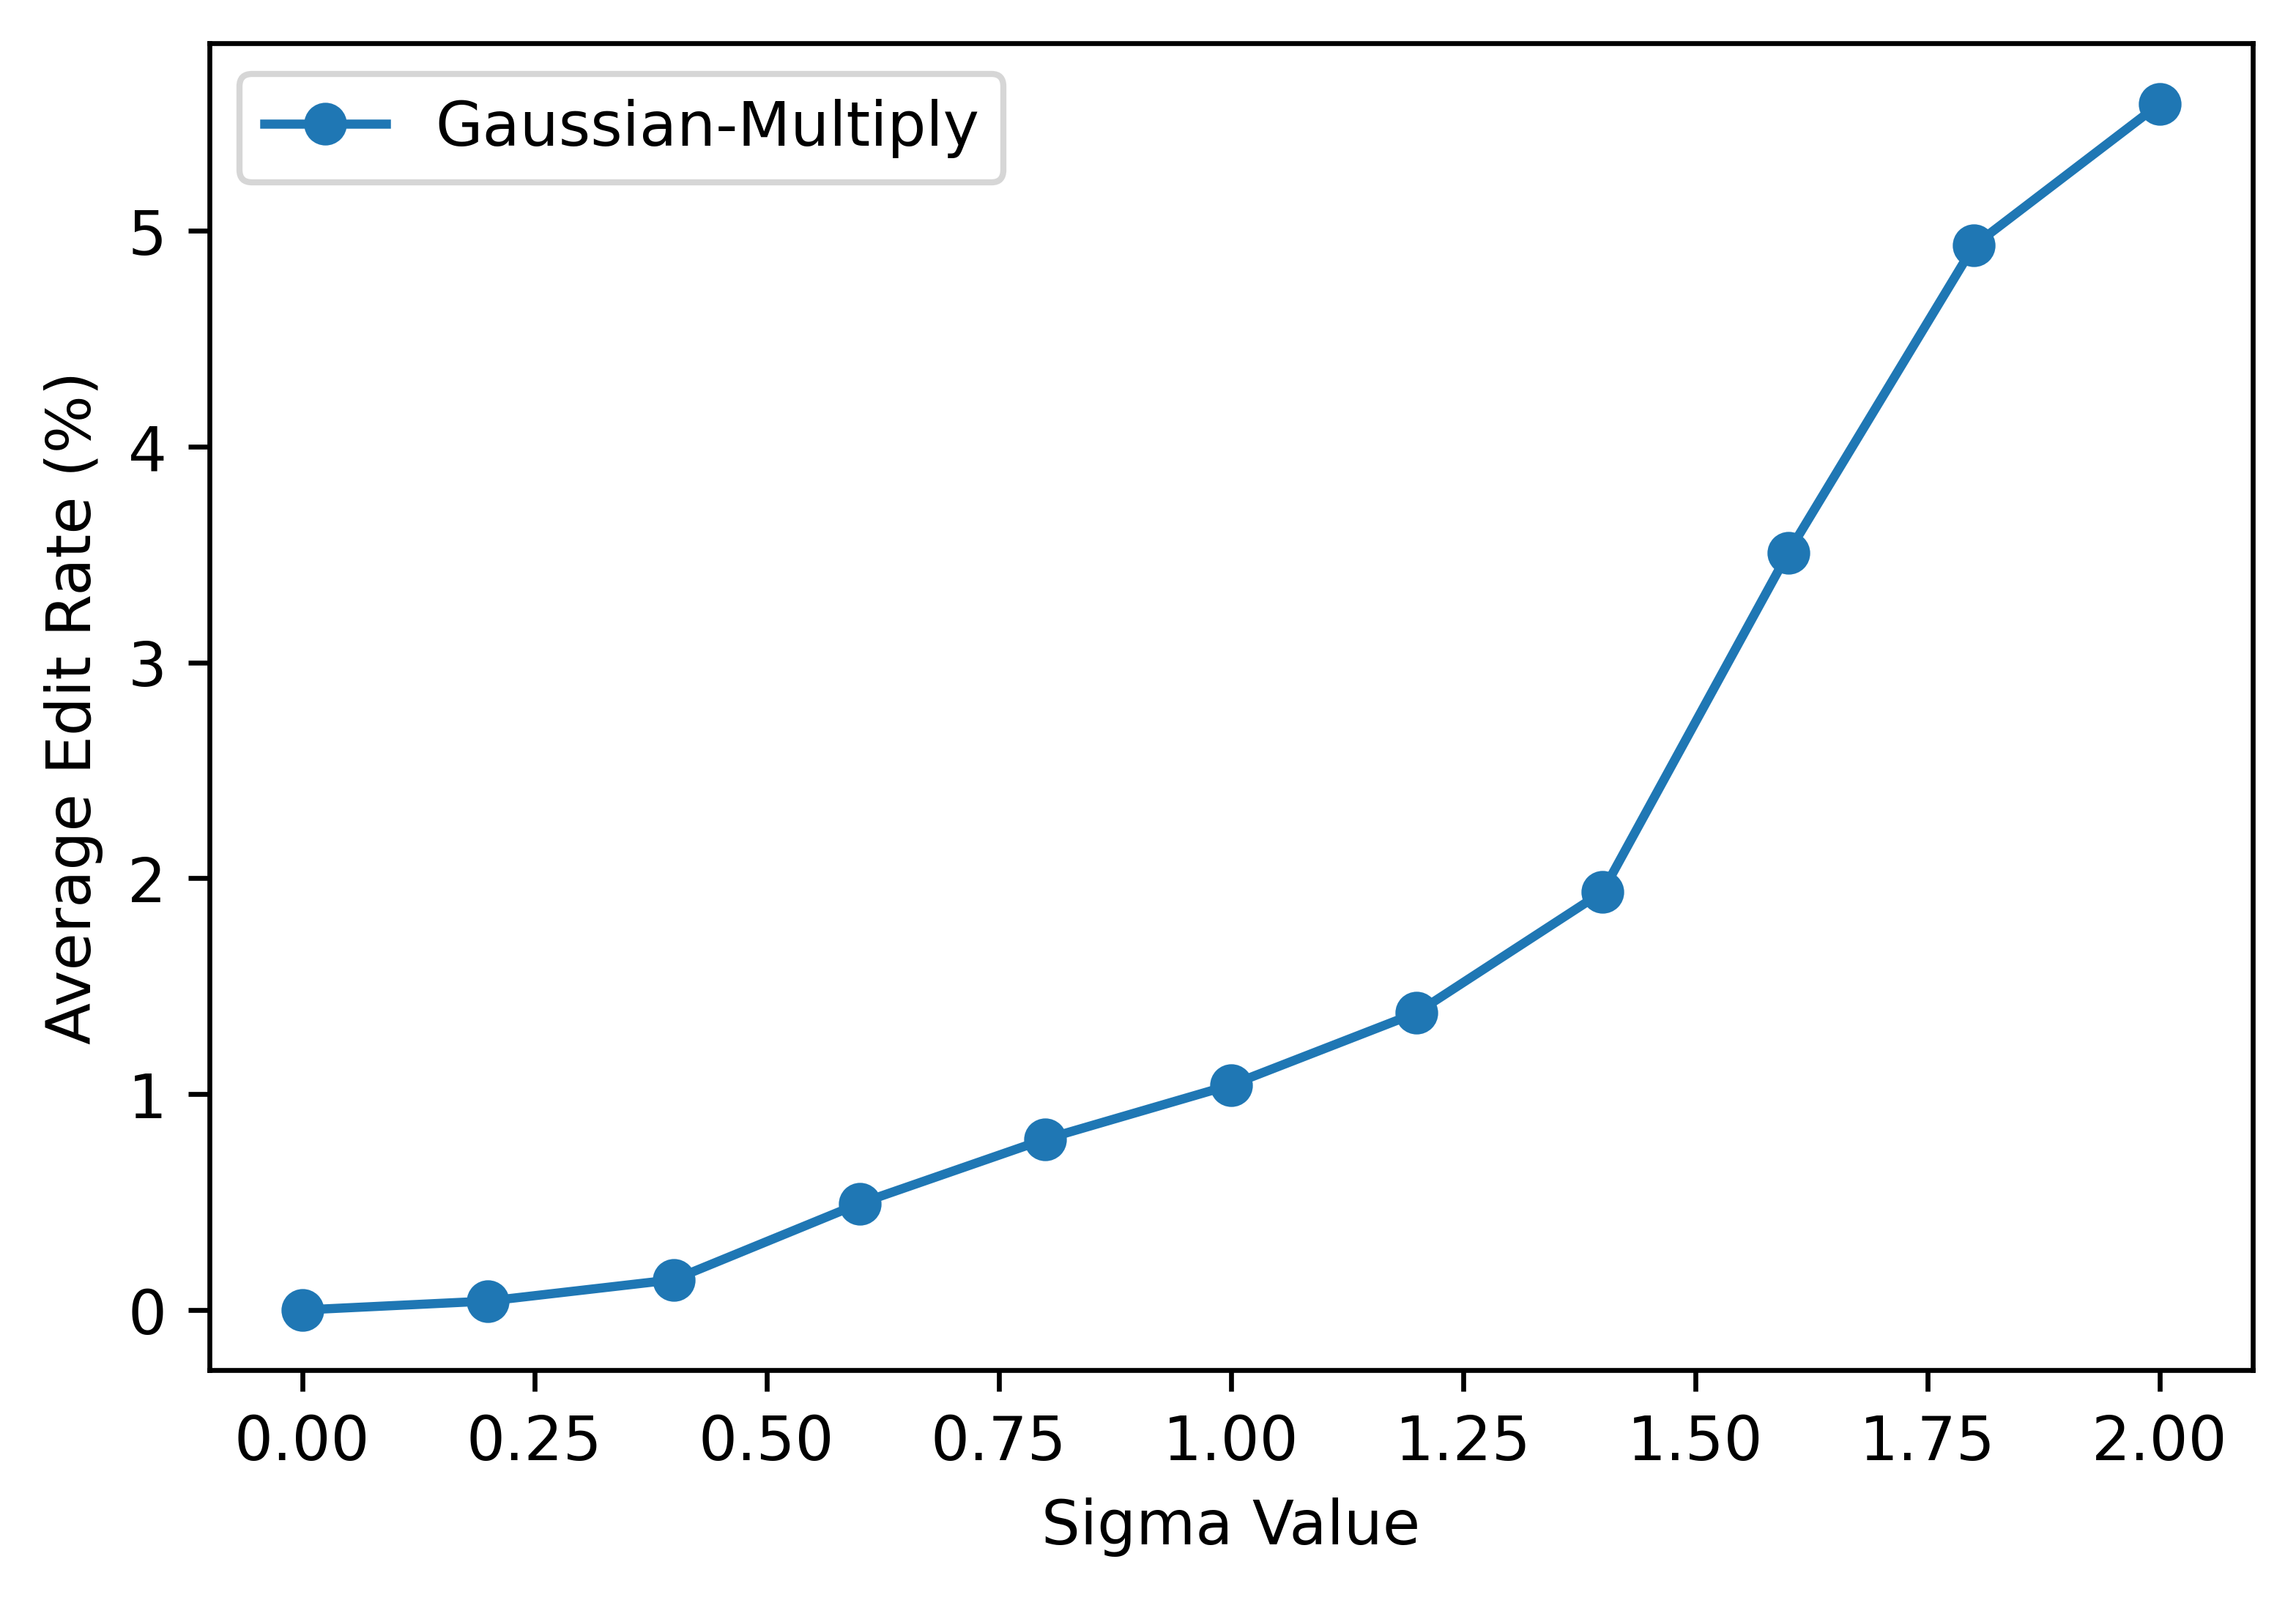

In [63]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edit rate']*100, marker='o',label='Gaussian-Multiply') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edit Rate (%)') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


In [3]:
txt_file = '/Users/yufanwang/Desktop/Study/Project/Data/count_add_gau.txt'

In [22]:
mean = []
weight = []
avg_count = []
avg_edit_rate = []

f = open(txt_file)               # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
for item in lines:
    value = item.split('/')
#     print(value)
    if len(value) > 11:
#         print(value[11][19:])
        mean.append(float(value[11][15:18]))
        weight.append(float(value[11][19:]))
        sub_value = value[12].split(' ')
#         print(sub_value)
        avg_count.append(int(sub_value[1])/1000)
        avg_edit_rate.append(float(sub_value[2][:-2])/1000)

In [31]:
data = {'mean':mean,
    'weight':weight,
       'avg edits':avg_count,
       'avg edit rate':avg_edit_rate}
df = pd.DataFrame(data)
df = df[(df['mean'] < 1) & (df['weight'] < 35)]
df

,mean,weight,avg edits,avg edit rate
8,0.0,0.0,0.000,0.000000
9,0.0,0.2,0.000,0.000000
10,0.0,0.4,0.004,0.000069
11,0.0,0.6,0.005,0.000046
12,0.0,0.8,0.008,0.000145
13,0.0,1.0,0.015,0.000220
14,0.0,1.2,0.020,0.000209
15,0.0,1.4,0.022,0.000341
16,0.0,1.6,0.026,0.000338
17,0.0,1.8,0.025,0.000312


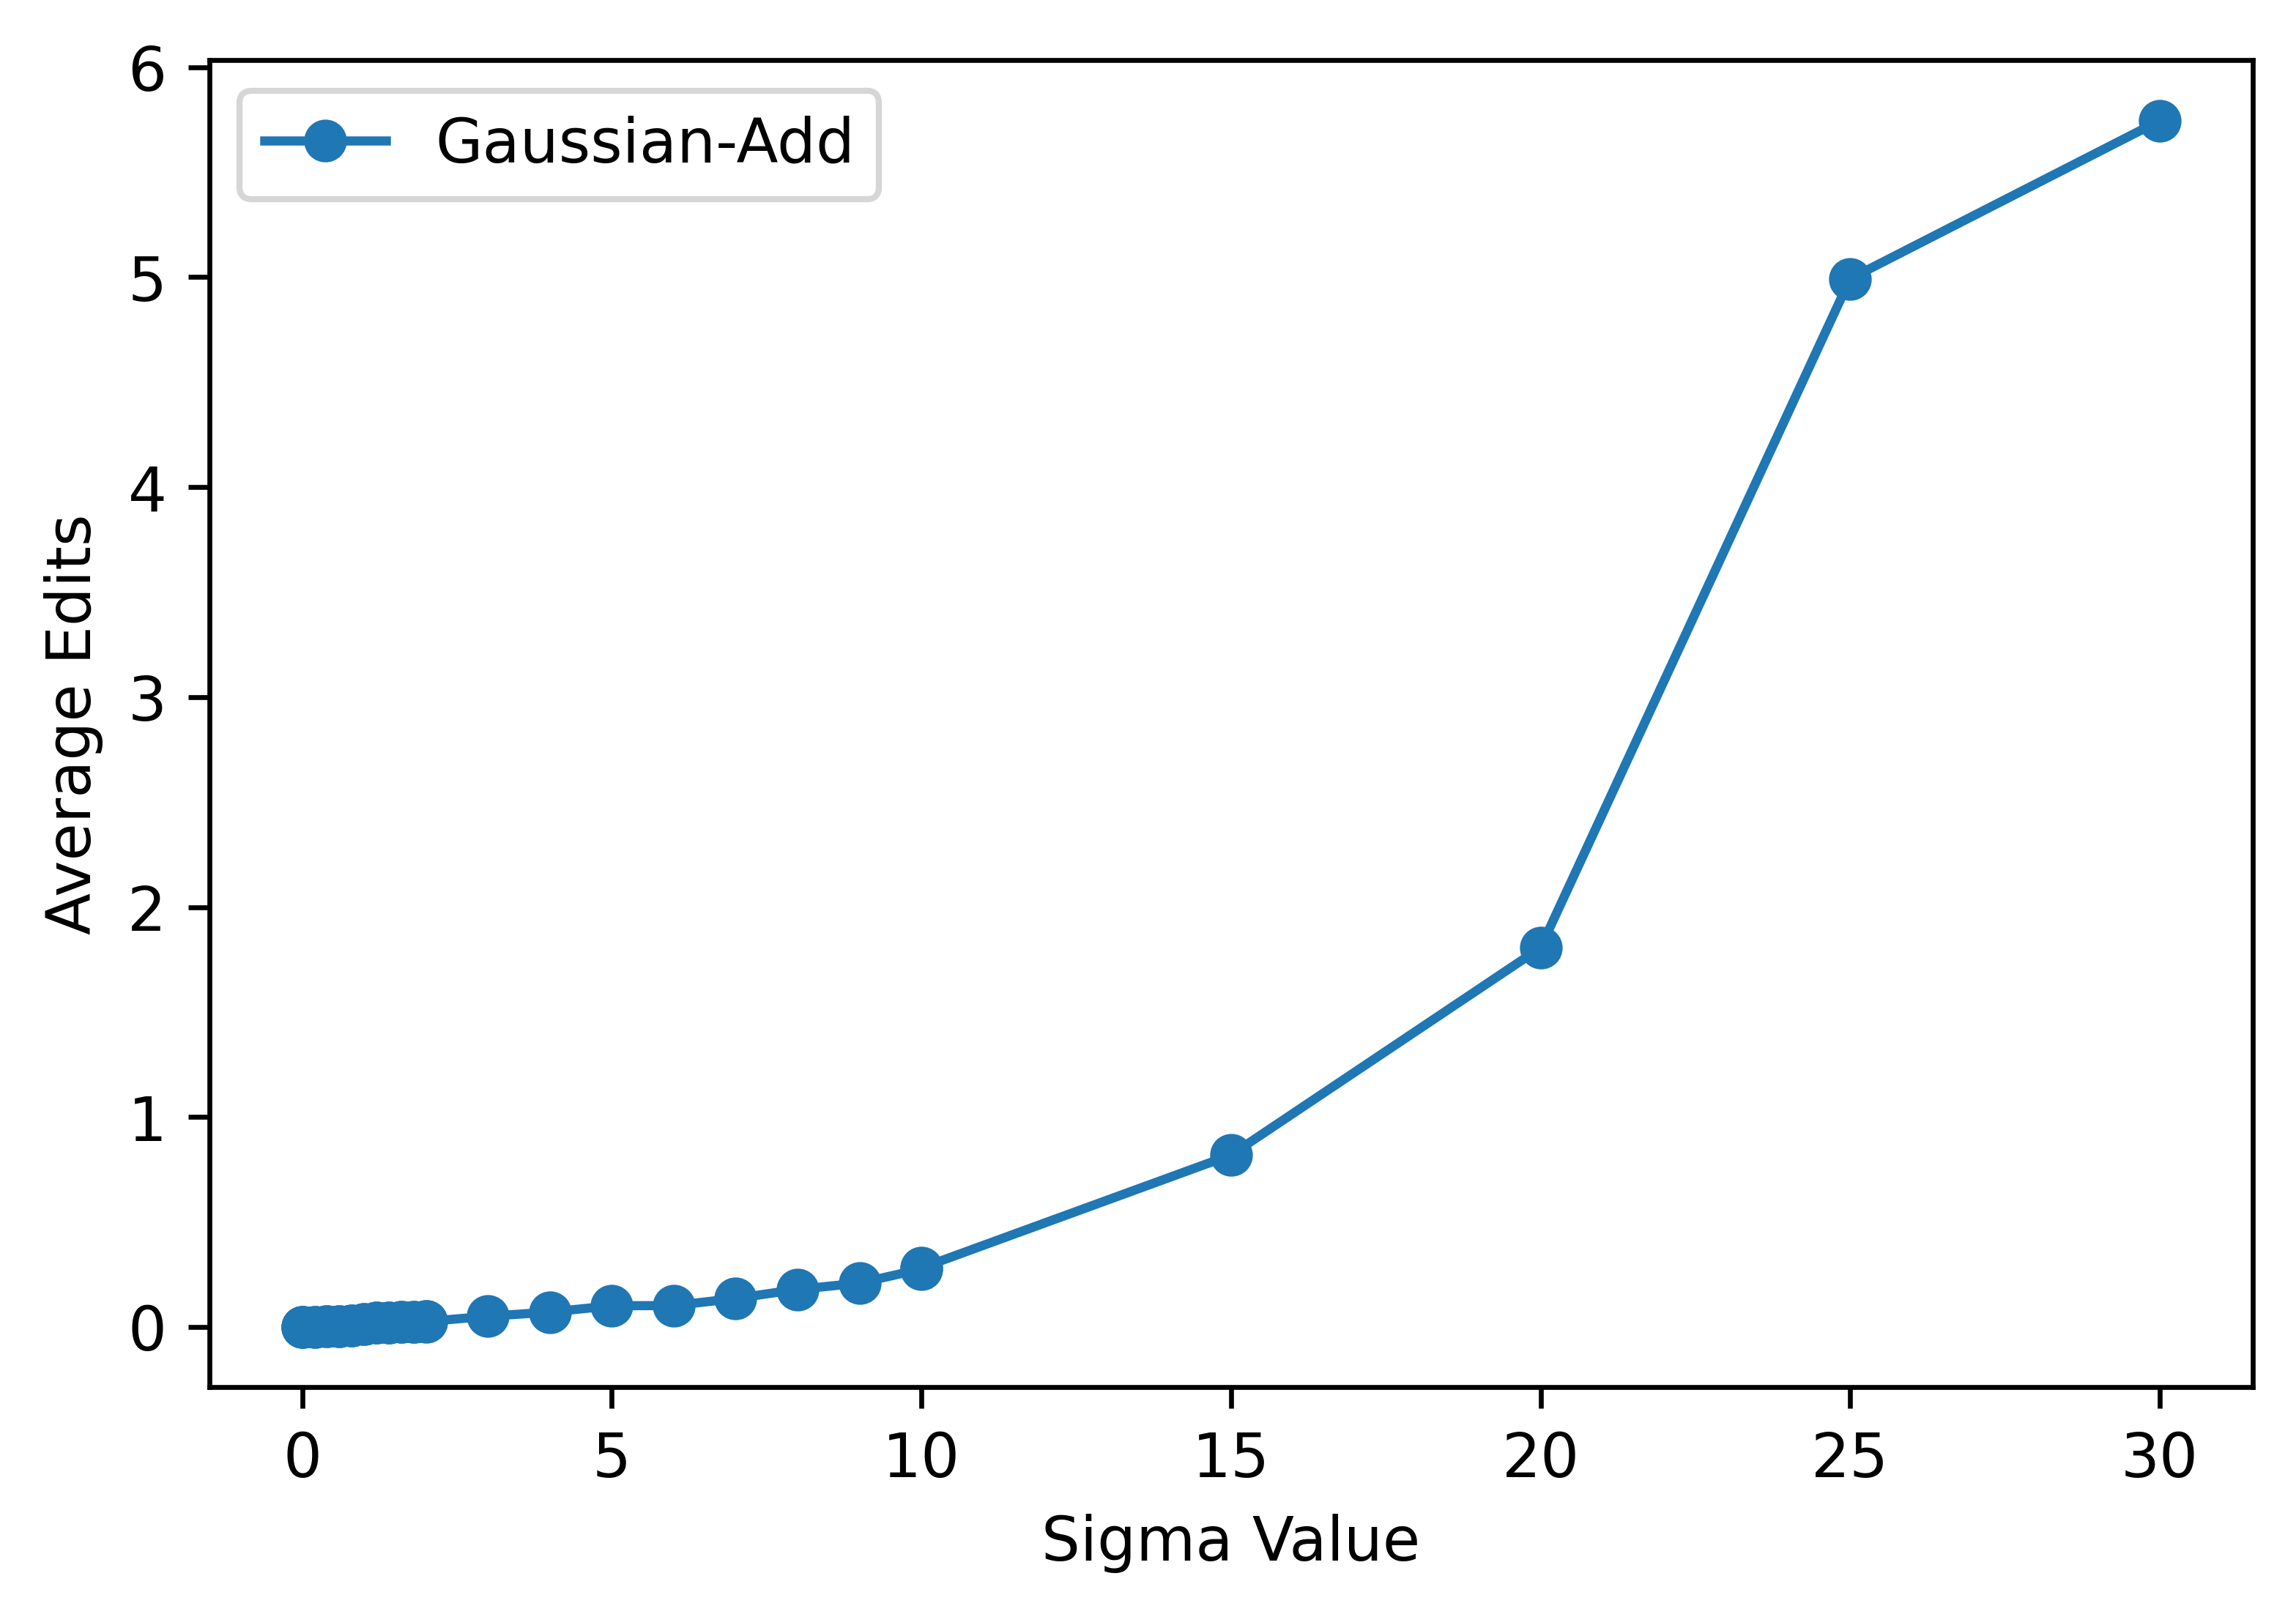

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edits'], marker='o',label='Gaussian-Add') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edits') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


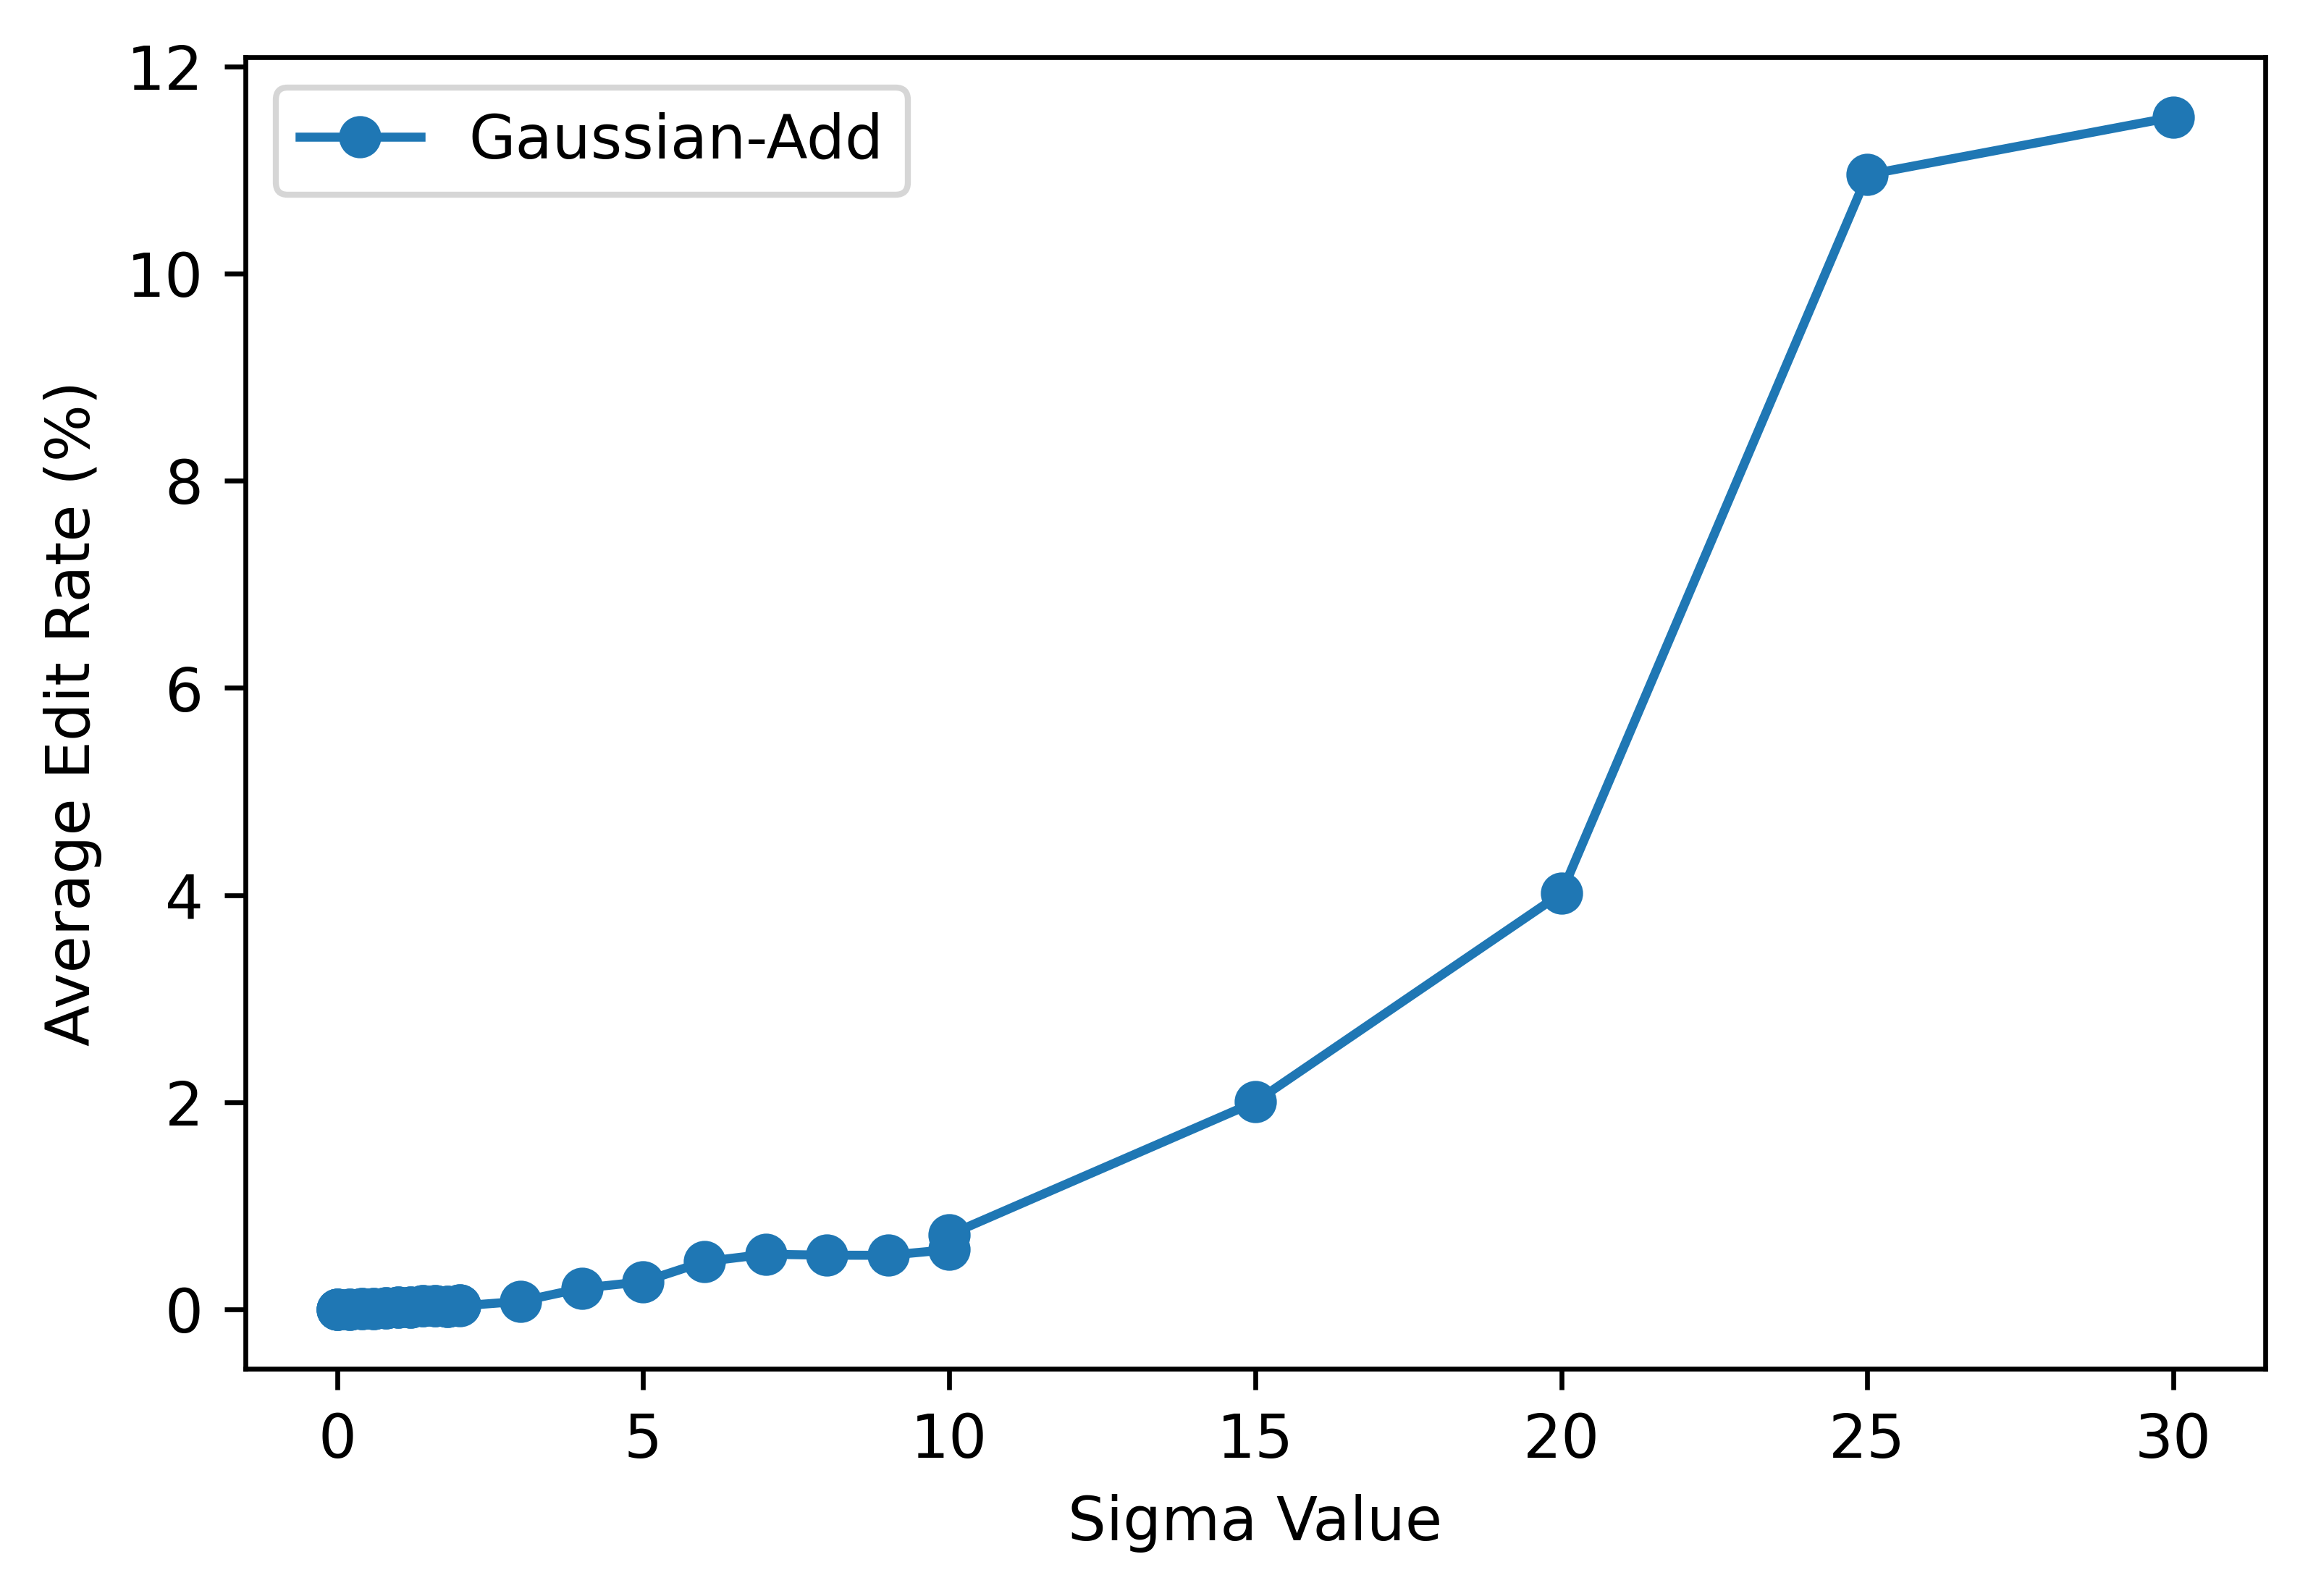

In [34]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edit rate']*100, marker='o',label='Gaussian-Add') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Sigma Value') #设置x轴名称 x label
ax.set_ylabel('Average Edit Rate (%)') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


In [35]:
txt_file = '/Users/yufanwang/Desktop/Study/Project/Data/count_ber.txt'

In [48]:
txt_file = '/Users/yufanwang/Desktop/Study/Project/Data/count_ber.txt'

mean = []
weight = []
avg_count = []
avg_edit_rate = []

f = open(txt_file)               # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
for item in lines:
    value = item.split('/')
#     print(value)
    if len(value) > 11:
#         print(value[11][16:])
#         mean.append(float(value[11][15:18]))
        weight.append(float(value[11][16:]))
        sub_value = value[12].split(' ')
        print(sub_value)
        avg_count.append(int(sub_value[1])/1000)
        avg_edit_rate.append(float(sub_value[2][:-2])/1000)

['translate.txt:', '7816', '189.23814883813083\n']
['translate.txt:', '4512', '90.5477311204144\n']
['translate.txt:', '1141', '26.97478302919834\n']
['translate.txt:', '533', '10.531942994805986\n']
['translate.txt:', '356', '7.846112115701742\n']
['translate.txt:', '264', '5.742173321906719\n']
['translate.txt:', '185', '2.77868688104715\n']
['translate.txt:', '108', '1.9848128396861133\n']
['translate.txt:', '71', '0.9843867046197715\n']
['translate.txt:', '0', '0.0\n']


In [50]:
data = {'weight':weight,
       'avg edits':avg_count,
       'avg edit rate':avg_edit_rate}
df = pd.DataFrame(data)
# df = df[(df['mean'] < 1) & (df['weight'] < 35)]
df

,weight,avg edits,avg edit rate
0,0.1,7.816,0.189238
1,0.2,4.512,0.090548
2,0.3,1.141,0.026975
3,0.4,0.533,0.010532
4,0.5,0.356,0.007846
5,0.6,0.264,0.005742
6,0.7,0.185,0.002779
7,0.8,0.108,0.001985
8,0.9,0.071,0.000984
9,1.0,0.000,0.000000


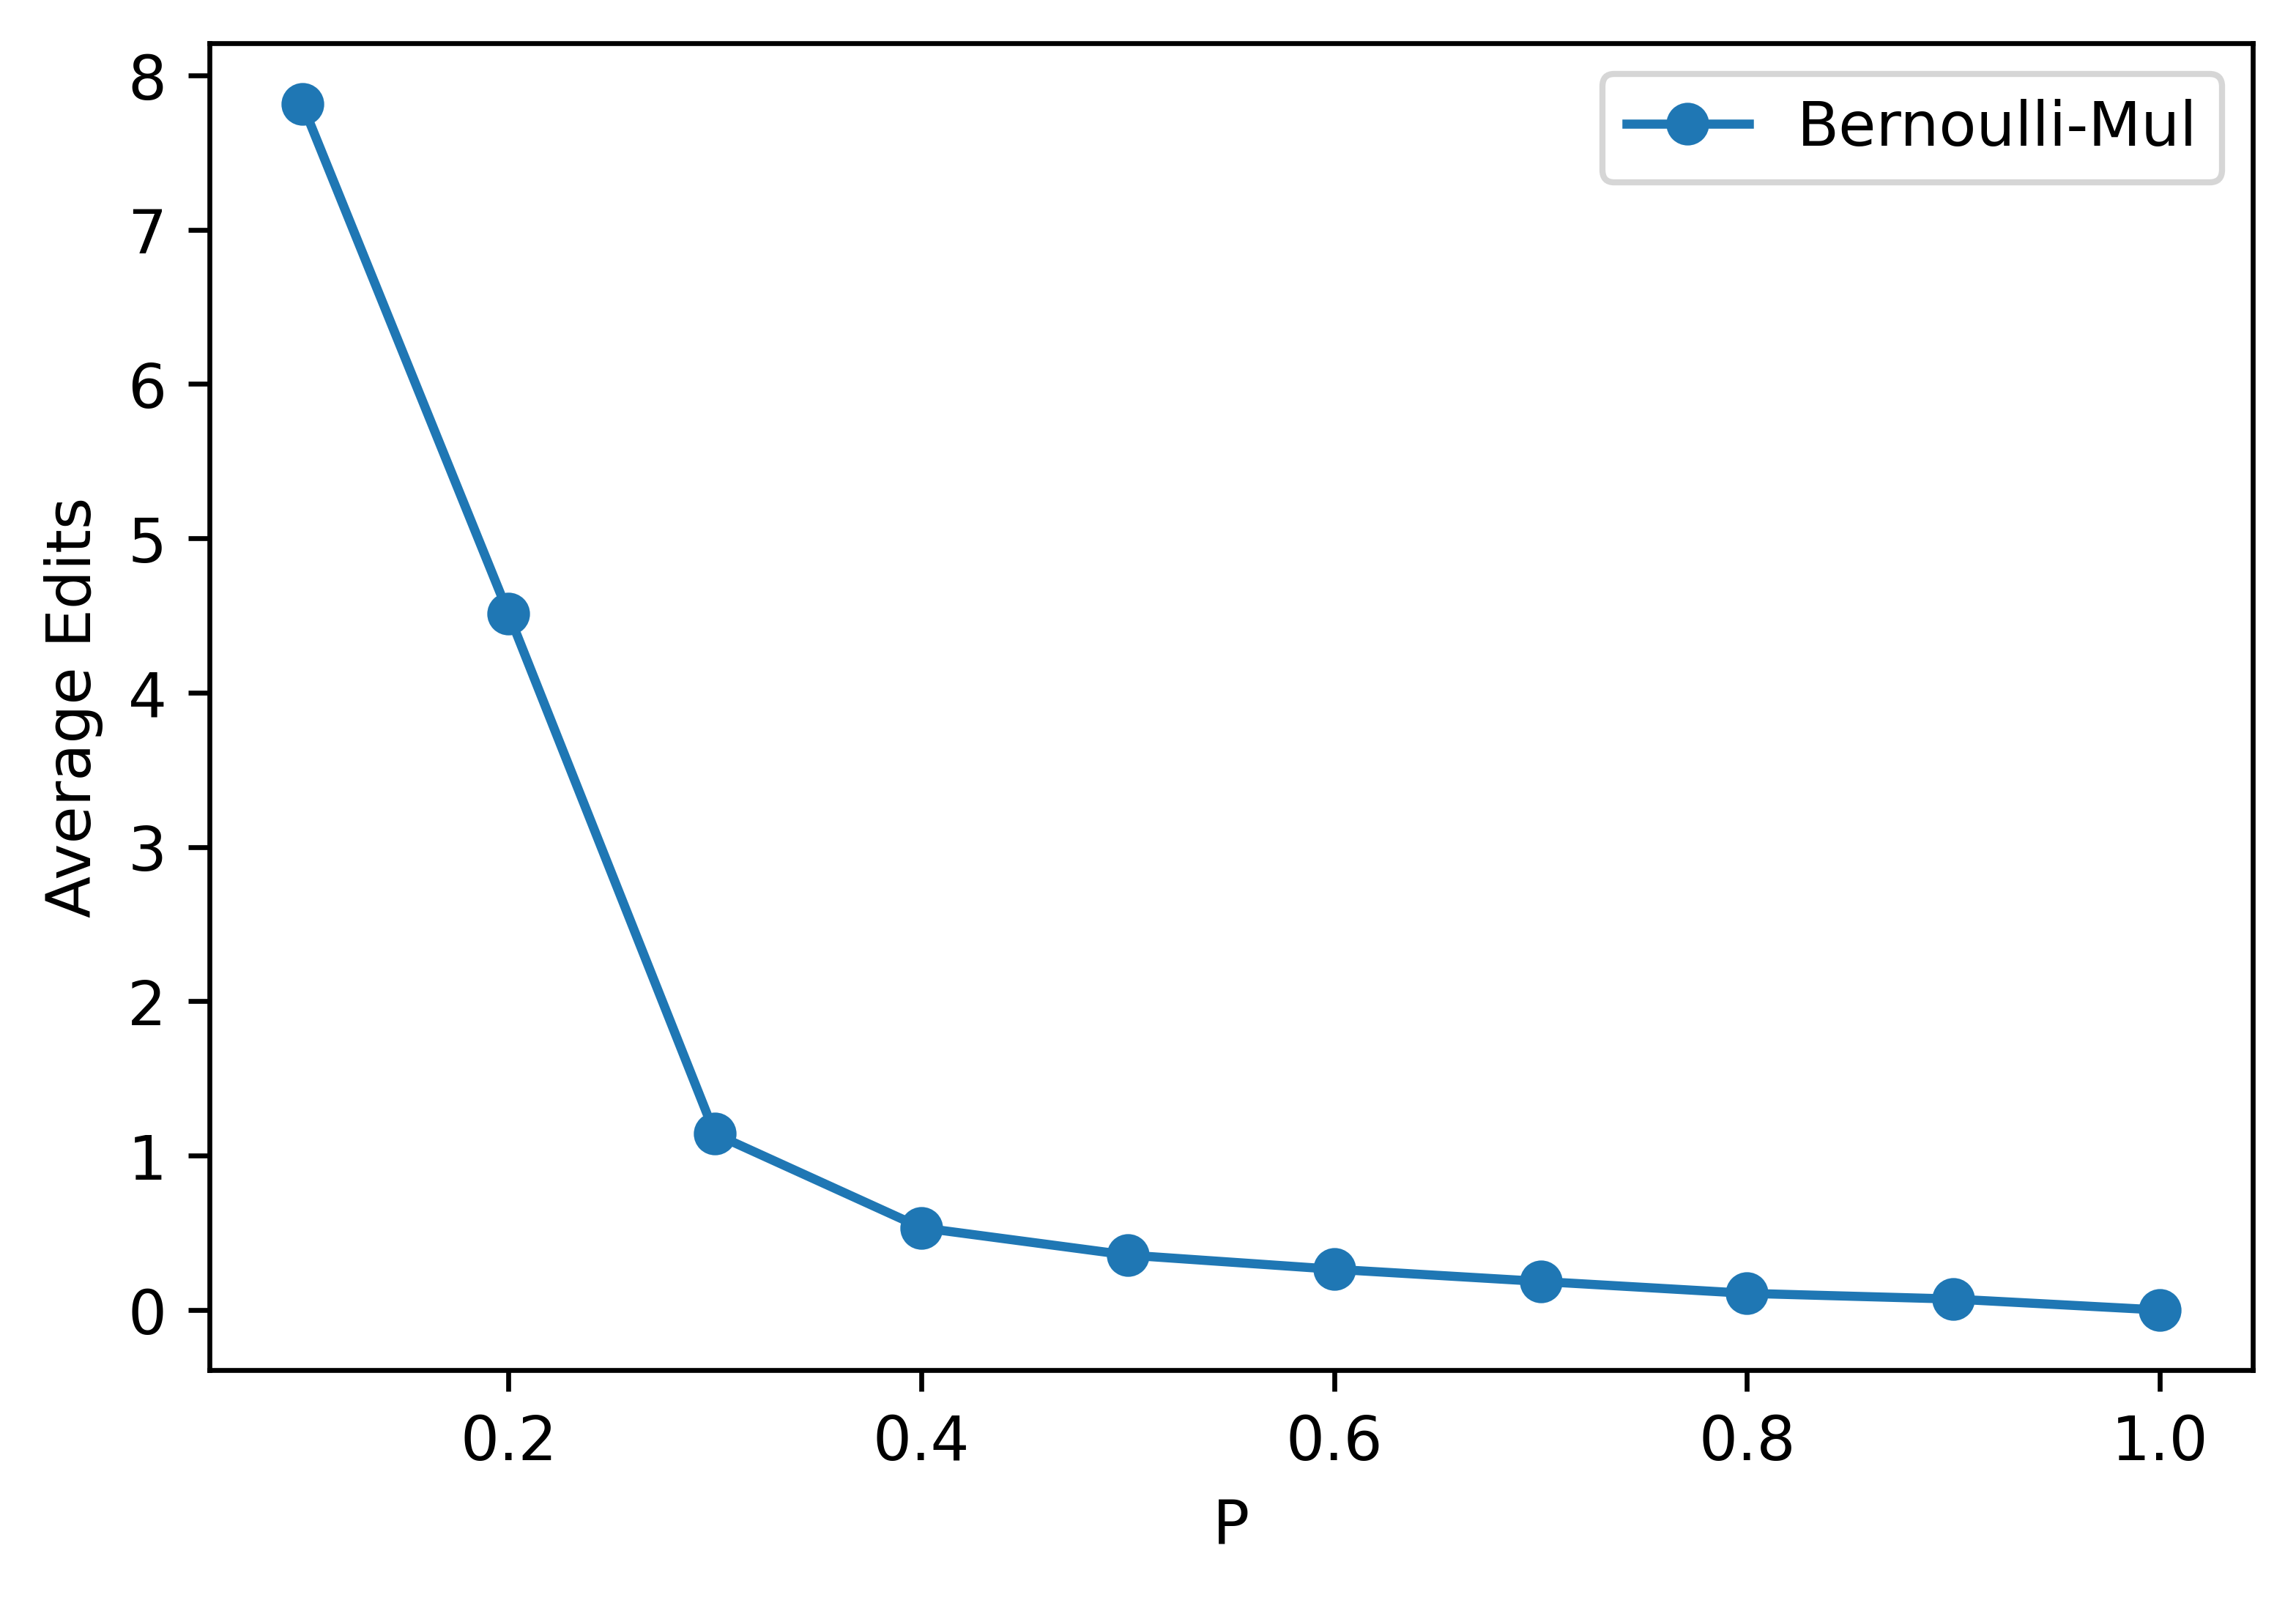

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edits'], marker='o',label='Bernoulli-Mul') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('P') #设置x轴名称 x label
ax.set_ylabel('Average Edits') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


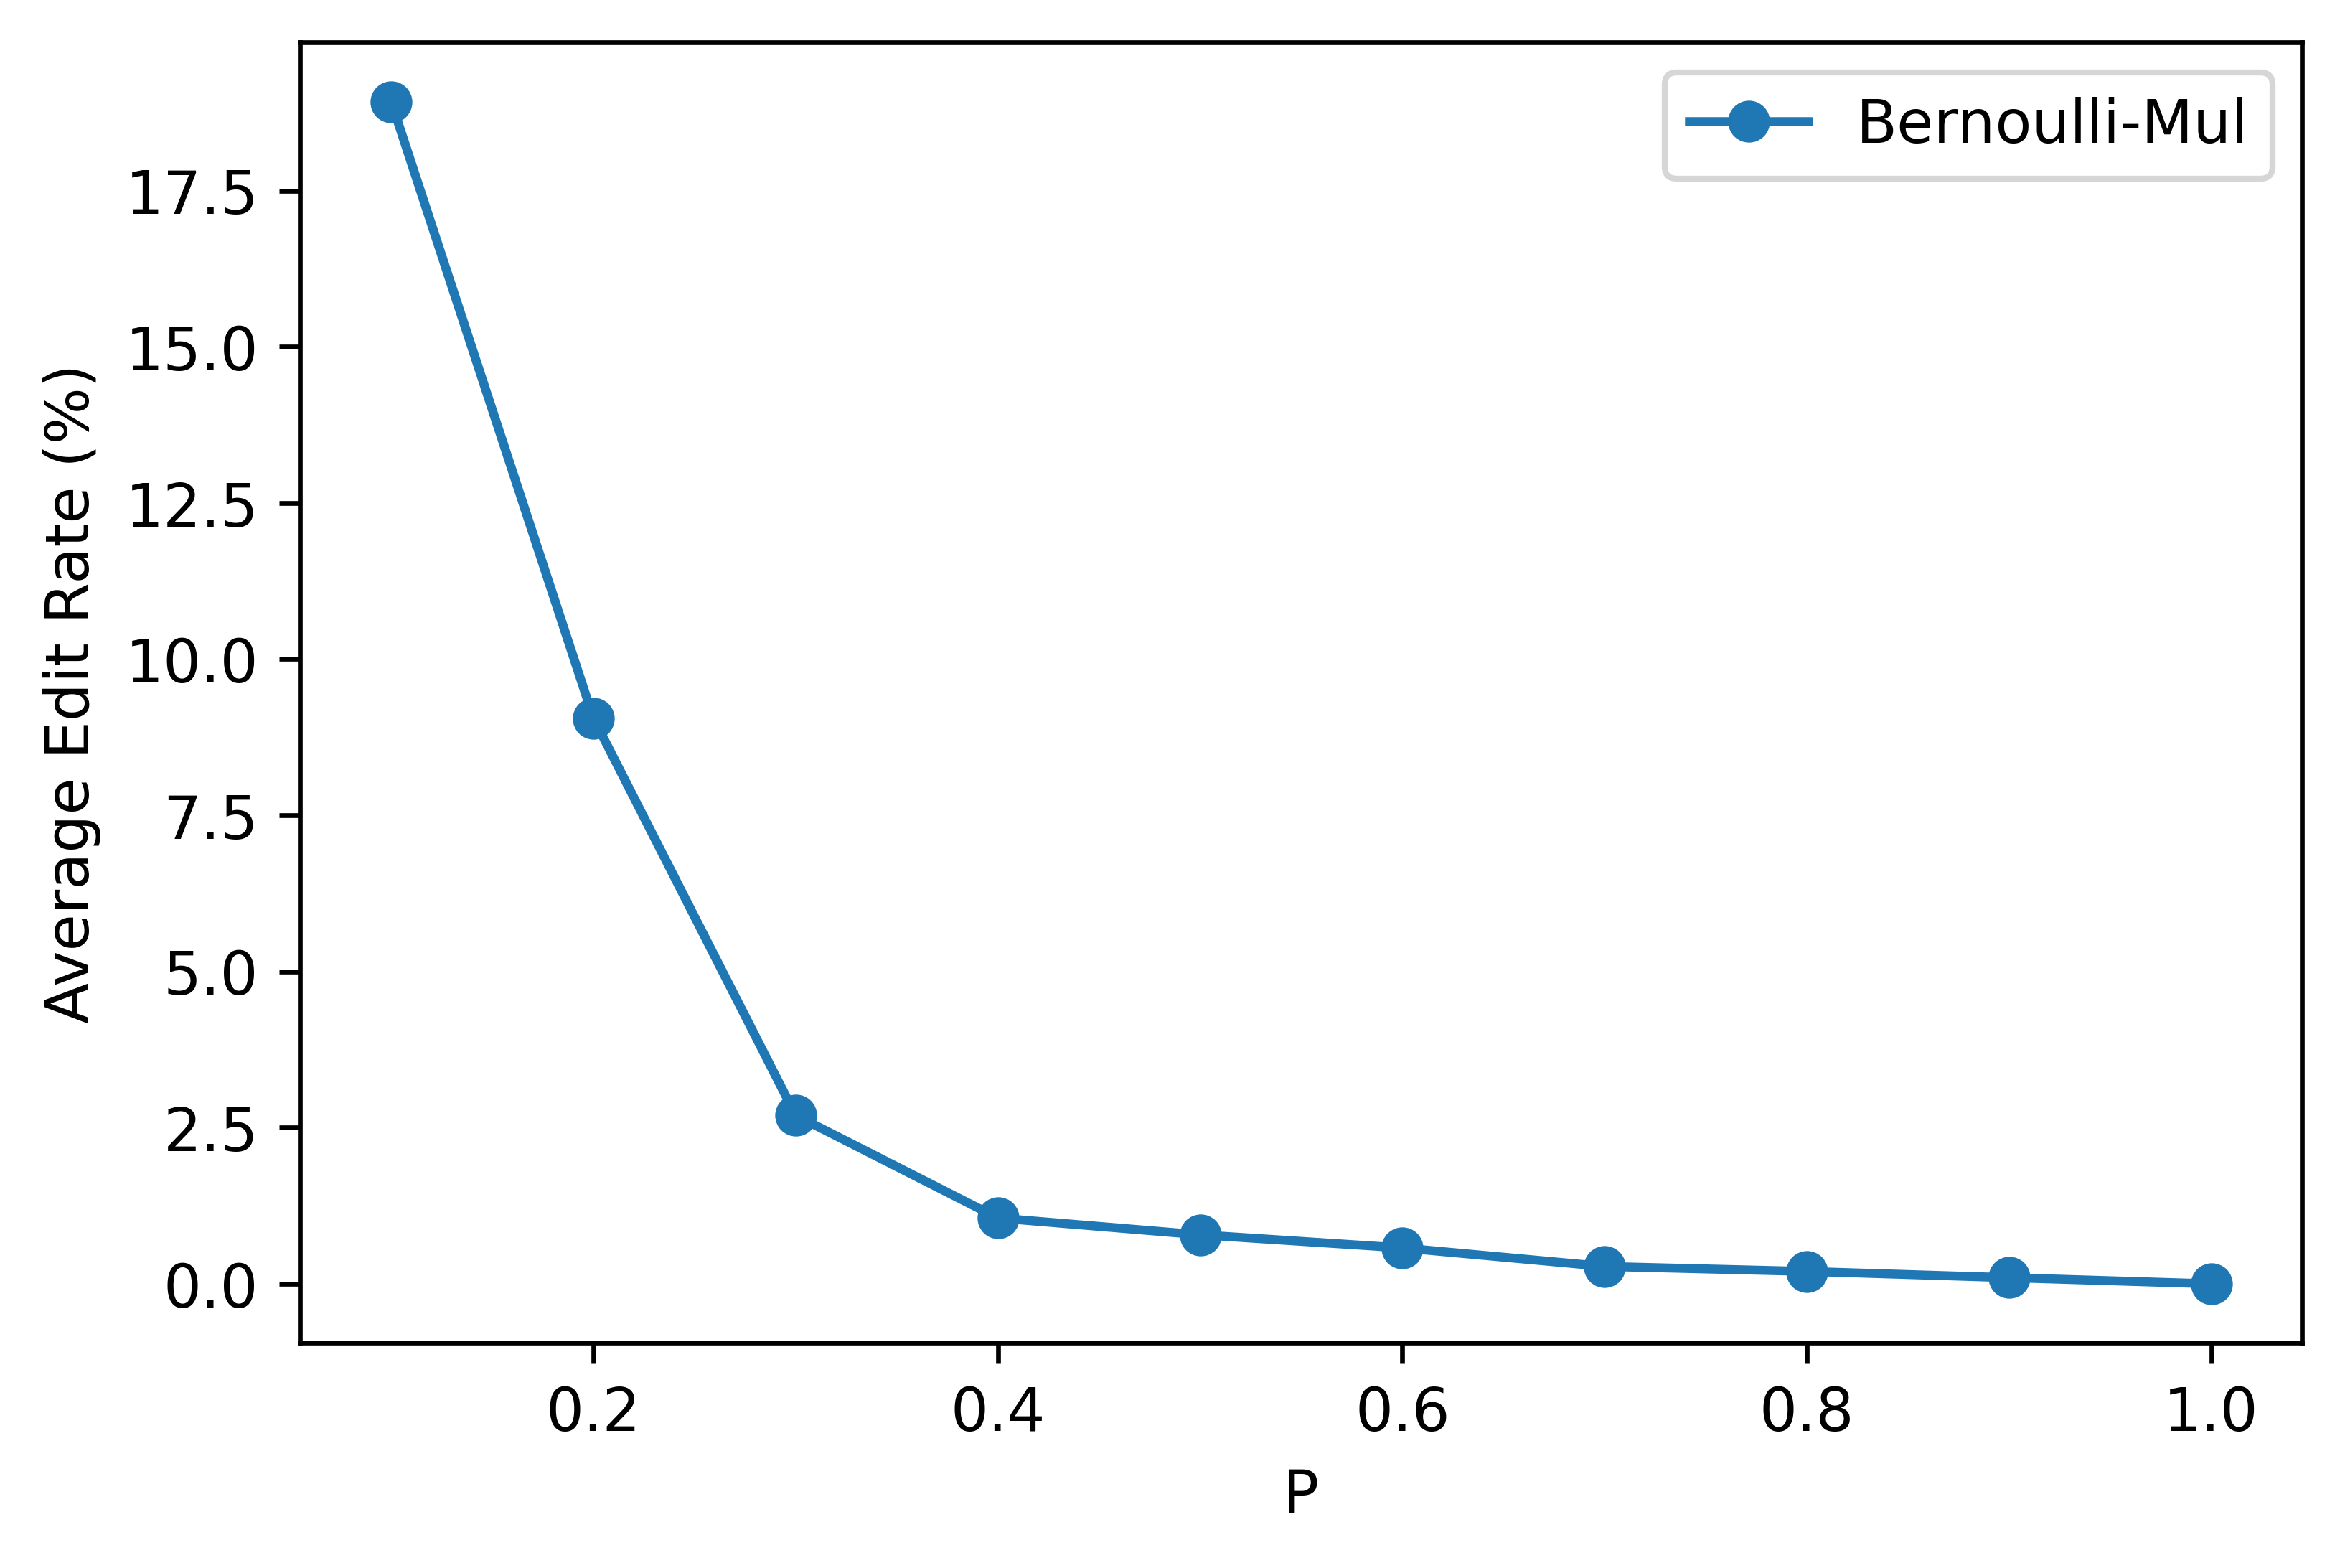

In [54]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(1)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['weight'], df['avg edit rate']*100, marker='o',label='Bernoulli-Mul') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('P') #设置x轴名称 x label
ax.set_ylabel('Average Edit Rate (%)') #设置y轴名称 y label
# ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化
